# Import library

In [609]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)
import glob

In [610]:
fpath =  'C:\\Users\\Ashraf\Desktop\\time series\\Chicago_Crime_2001-2022\\Data'
all_files = glob.glob(fpath + "/*.csv")
dfs= [] 
for filename in all_files:
    df = pd.read_csv(filename, low_memory=False)
    dfs.append(df)

combined_df = pd.concat(dfs)

In [611]:
combined_df.head()
combined_df['Date']

0         01/01/2001 01:00:00 AM
1         01/01/2001 01:00:00 PM
2         01/01/2001 01:00:00 PM
3         01/01/2001 01:00:00 AM
4         01/01/2001 01:00:00 AM
                   ...          
238853    12/31/2022 12:50:00 PM
238854    12/31/2022 12:50:00 PM
238855    12/31/2022 12:52:00 AM
238856    12/31/2022 12:52:00 PM
238857    12/31/2022 12:59:00 PM
Name: Date, Length: 7713109, dtype: object

# Data preprocessing

In [612]:
combined_df.head()
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [613]:
# drop columns 
drop_col  =  ['ID','Domestic','Beat','Ward','Latitude', 'Longitude' ,'Description' ]
combined_df = combined_df.drop(columns= drop_col)
combined_df

Date        Primary Type  \
0       01/01/2001 01:00:00 AM             BATTERY   
1       01/01/2001 01:00:00 PM             BATTERY   
2       01/01/2001 01:00:00 PM            GAMBLING   
3       01/01/2001 01:00:00 AM     CRIMINAL DAMAGE   
4       01/01/2001 01:00:00 AM             BATTERY   
...                        ...                 ...   
238853  12/31/2022 12:50:00 PM             ASSAULT   
238854  12/31/2022 12:50:00 PM             ASSAULT   
238855  12/31/2022 12:52:00 AM             BATTERY   
238856  12/31/2022 12:52:00 PM             ASSAULT   
238857  12/31/2022 12:59:00 PM  DECEPTIVE PRACTICE   

                Location Description  Arrest  District  
0                          RESIDENCE   False      16.0  
1                          RESIDENCE   False       8.0  
2                             STREET    True       3.0  
3                             STREET   False      24.0  
4            RESIDENCE PORCH/HALLWAY   False       2.0  
...                              ...     ...       ...  
238853                     APARTMENT   False      10.0  
238854                     APARTMENT   False       7.0  
238855                    BARBERSHOP   False      11.0  
238856  COMMERCIAL / BUSINESS OFFICE   False      14.0  
238857                     RESIDENCE   False      15.0  

[7713109 rows x 5 columns]

In [614]:
# Preparing the Date Time Index  
combined_df['Date']=  pd.to_datetime(combined_df['Date'] , errors='coerce')
#combined_df['Date'].isna().sum()
# set index
#df.set_index('Date',  inplace=True)

In [615]:
combined_df.set_index('Date',  inplace=True)

In [616]:
combined_df['Primary Type'].value_counts()

THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING

<Axes: >

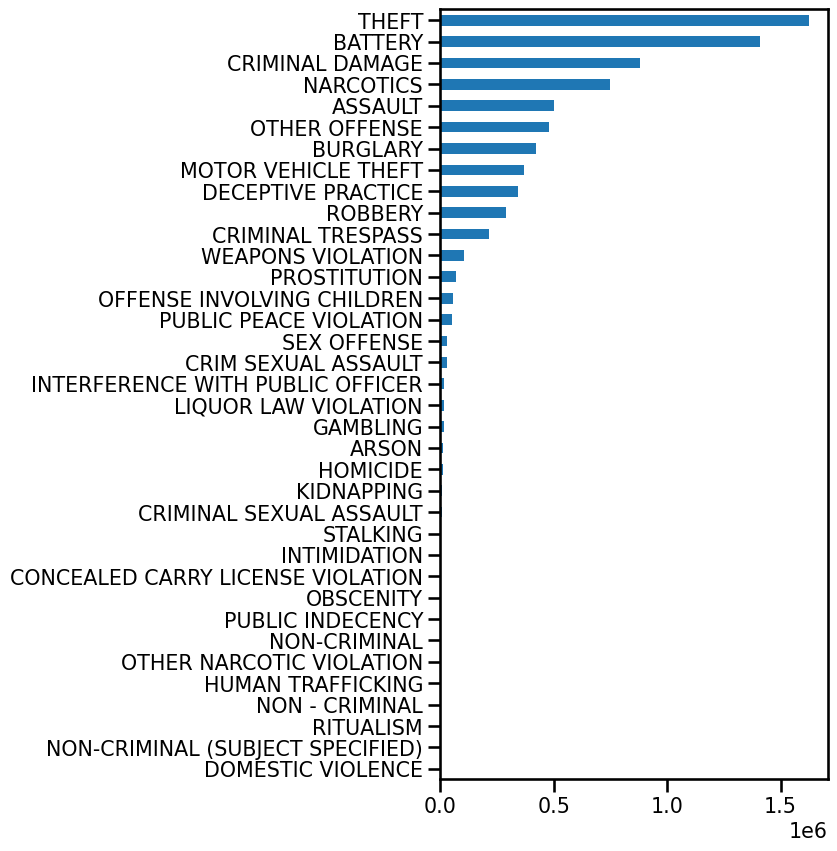

In [617]:
## Inspect the value_counts for the different types of crimes
craime_counts =  combined_df['Primary Type'].value_counts()
craime_counts.sort_values().plot(kind= "barh", figsize= (5,10))


In [618]:
craime_counts =  combined_df['Primary Type'].value_counts().to_frame('Total of Crimes ')
craime_counts

Total of Crimes 
THEFT                                       1626992
BATTERY                                     1410889
CRIMINAL DAMAGE                              878914
NARCOTICS                                    746155
ASSAULT                                      501103
OTHER OFFENSE                                479174
BURGLARY                                     422246
MOTOR VEHICLE THEFT                          366586
DECEPTIVE PRACTICE                           340958
ROBBERY                                      289677
CRIMINAL TRESPASS                            212869
WEAPONS VIOLATION                            103906
PROSTITUTION                                  69750
OFFENSE INVOLVING CHILDREN                    55280
PUBLIC PEACE VIOLATION                        52086
SEX OFFENSE                                   30442
CRIM SEXUAL ASSAULT                           27584
INTERFERENCE WITH PUBLIC OFFICER              18206
LIQUOR LAW VIOLATION                          14846
GAMBLING                                      14616
ARSON                                         13121
HOMICIDE                                      12394
KIDNAPPING                                     7185
CRIMINAL SEXUAL ASSAULT                        6353
STALKING                                       4664
INTIMIDATION                                   4595
CONCEALED CARRY LICENSE VIOLATION              1019
OBSCENITY                                       810
PUBLIC INDECENCY                                193
NON-CRIMINAL                                    181
OTHER NARCOTIC VIOLATION                        147
HUMAN TRAFFICKING                                96
NON - CRIMINAL                                   38
RITUALISM                                        24
NON-CRIMINAL (SUBJECT SPECIFIED)                  9
DOMESTIC VIOLENCE                                 1

In [619]:
# Using Dictionaries and Loops to Prepare Time Series 
crime_list = combined_df['Primary Type'].unique()

# 2. Create an empty dictionary  
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = combined_df.loc[combined_df['Primary Type']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("D").size() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()




dict_keys(['BATTERY', 'GAMBLING', 'CRIMINAL DAMAGE', 'OFFENSE INVOLVING CHILDREN', 'THEFT', 'ASSAULT', 'NARCOTICS', 'CRIM SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'WEAPONS VIOLATION', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE', 'BURGLARY', 'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'])

In [620]:
crims_data = pd.DataFrame(CRIMES)
crims_data

BATTERY  GAMBLING  CRIMINAL DAMAGE  OFFENSE INVOLVING CHILDREN  \
Date                                                                         
2001-01-01      296       2.0              233                         100   
2001-01-02      143       1.0              118                           4   
2001-01-03      165       0.0              136                           3   
2001-01-04      173       2.0              133                           5   
2001-01-05      178       0.0              142                           9   
...             ...       ...              ...                         ...   
2022-12-27       76       NaN               64                           4   
2022-12-28      102       NaN               78                           3   
2022-12-29       97       NaN               95                           3   
2022-12-30      106       NaN              100                           4   
2022-12-31      122       NaN              128                           5   

            THEFT  ASSAULT  NARCOTICS  CRIM SEXUAL ASSAULT  \
Date                                                         
2001-01-01    412       70         97                 38.0   
2001-01-02    221       66        175                  2.0   
2001-01-03    226       79        133                  7.0   
2001-01-04    243       57        142                  2.0   
2001-01-05    265       68        185                  6.0   
...           ...      ...        ...                  ...   
2022-12-27    147       47          9                  NaN   
2022-12-28    112       44         12                  NaN   
2022-12-29    137       38         15                  NaN   
2022-12-30    125       51          8                  NaN   
2022-12-31    102       62          6                  NaN   

            DECEPTIVE PRACTICE  WEAPONS VIOLATION  OTHER OFFENSE  \
Date                                                               
2001-01-01                  94                 32            167   
2001-01-02                  78                  9            101   
2001-01-03                  49                  7             96   
2001-01-04                  42                  9             96   
2001-01-05                  53                  6             90   
...                        ...                ...            ...   
2022-12-27                  40                 12             33   
2022-12-28                  38                 17             38   
2022-12-29                  38                 11             37   
2022-12-30                  43                 23             38   
2022-12-31                  43                 58             37   

            MOTOR VEHICLE THEFT  SEX OFFENSE  BURGLARY  \
Date                                                     
2001-01-01                   60           65        66   
2001-01-02                   65            4        68   
2001-01-03                   72            5        57   
2001-01-04                   87            1        55   
2001-01-05                   86            2        55   
...                         ...          ...       ...   
2022-12-27                   77            2        17   
2022-12-28                  103            0        23   
2022-12-29                   95            3        29   
2022-12-30                   95            0        18   
2022-12-31                   88            3        21   

            PUBLIC PEACE VIOLATION  LIQUOR LAW VIOLATION  ROBBERY  \
Date                                                                
2001-01-01                       5                     3       41   
2001-01-02                       2                     2       35   
2001-01-03                       7                     2       51   
2001-01-04                       3                     4       55   
2001-01-05                       5                     8       55   
...                            ...                   ...      ...  

# Topic 1) Comparing Police Districts
   *  Which district had the most crimes in 2022?
   *  Which had the least?

<Axes: >

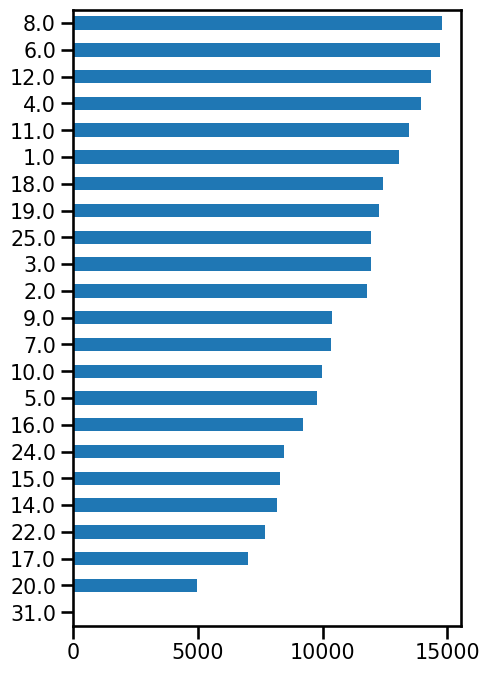

In [621]:
# Which district had the most crimes in 2022?
df_22 = combined_df.loc['2022']
most_crimes_22= df_22['District'].value_counts()
most_crimes_22.sort_values().plot(kind='barh', figsize=(5,8))

In [622]:
most_crimes_22= df['District'].value_counts().to_frame('district had the most crimes in 2022')
most_crimes_22

district had the most crimes in 2022
8.0                                  14805
6.0                                  14694
12.0                                 14341
4.0                                  13931
11.0                                 13457
1.0                                  13044
18.0                                 12429
19.0                                 12243
25.0                                 11951
3.0                                  11937
2.0                                  11793
9.0                                  10376
7.0                                  10319
10.0                                  9961
5.0                                   9773
16.0                                  9226
24.0                                  8469
15.0                                  8308
14.0                                  8158
22.0                                  7671
17.0                                  6997
20.0                                  4960
31.0                                    15

* Which had the least?  
    * district 31  

# Topic 2) Crimes Across the Years:
 * Is the total number of crimes increasing or decreasing across the years?
 * Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
​

<Axes: title={'center': 'Crimes Across the Years'}>

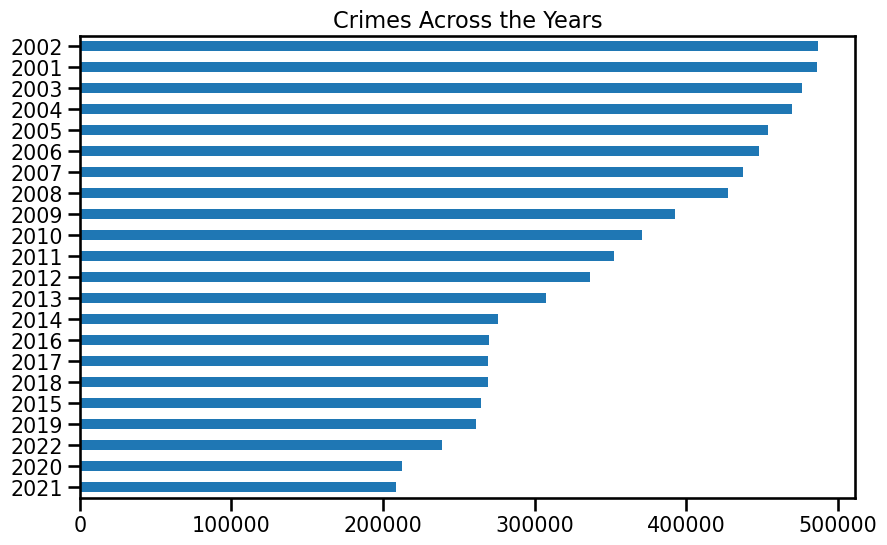

In [623]:
crimes_years =combined_df.index.year.value_counts()
crimes_years.sort_values().plot(kind='barh' , figsize= (10,6) , title = 'Crimes Across the Years')

In [624]:
combined_df['Years'] = combined_df.index.year


<Axes: xlabel='Year', ylabel='# of Crimes'>

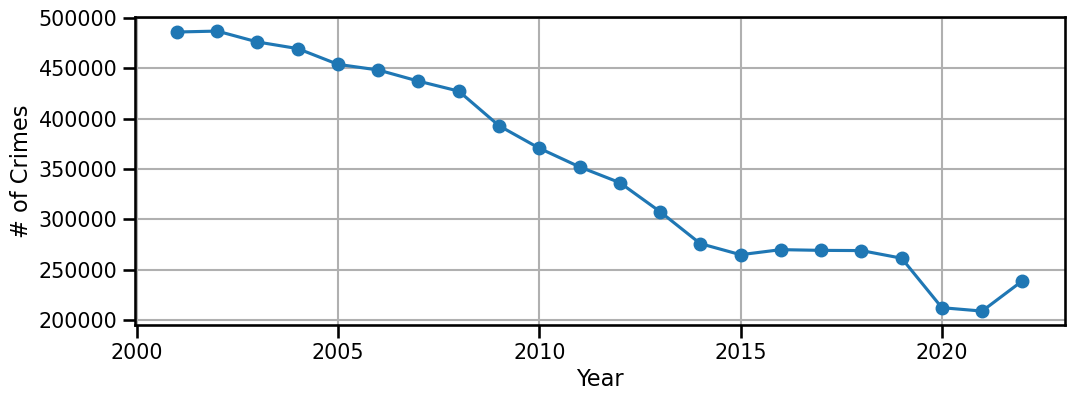

In [625]:
crimes_year = combined_df['Years'].value_counts().sort_index()
crimes_year.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year')

In [626]:
crimes_per_type_per_year= combined_df.groupby(['Years','Primary Type']).size()
crimes_per_type_per_year


Years  Primary Type                     
2001   ARSON                                 1011
       ASSAULT                              31384
       BATTERY                              93461
       BURGLARY                             26014
       CONCEALED CARRY LICENSE VIOLATION        1
                                            ...  
2022   ROBBERY                               8965
       SEX OFFENSE                           1225
       STALKING                               446
       THEFT                                54820
       WEAPONS VIOLATION                     8766
Length: 689, dtype: int64

In [627]:
plot_df =  crimes_per_type_per_year.to_frame('# of Crimes').reset_index()
plot_df

Years                       Primary Type  # of Crimes
0     2001                              ARSON         1011
1     2001                            ASSAULT        31384
2     2001                            BATTERY        93461
3     2001                           BURGLARY        26014
4     2001  CONCEALED CARRY LICENSE VIOLATION            1
..     ...                                ...          ...
684   2022                            ROBBERY         8965
685   2022                        SEX OFFENSE         1225
686   2022                           STALKING          446
687   2022                              THEFT        54820
688   2022                  WEAPONS VIOLATION         8766

[689 rows x 3 columns]

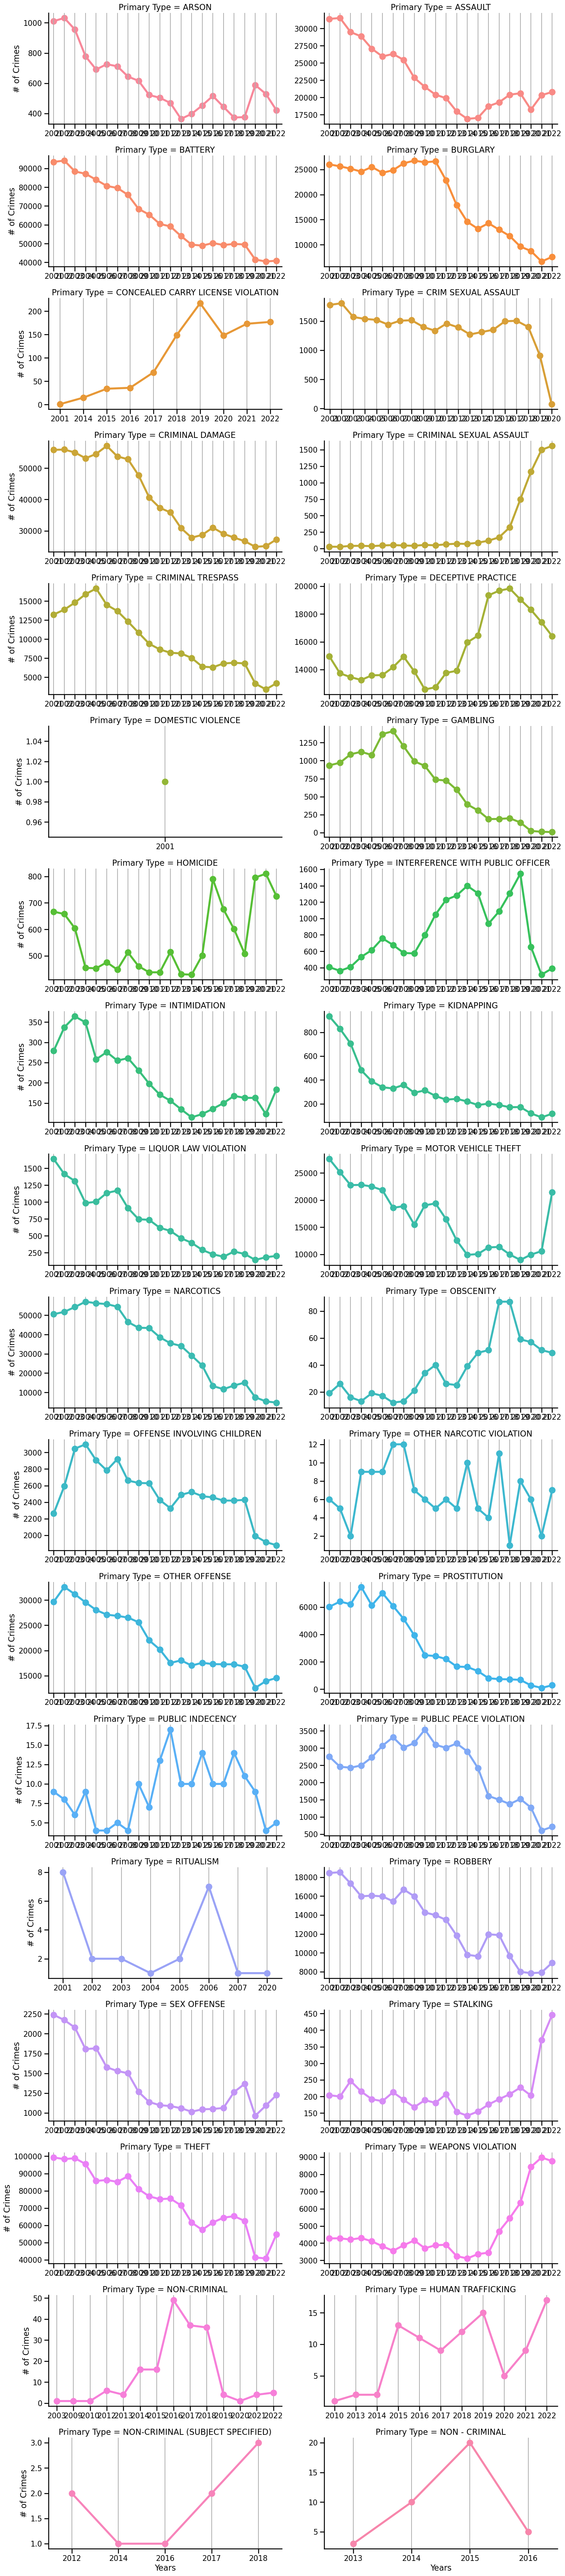

In [628]:
g = sns.catplot(data=plot_df, x='Years', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];



# Topic 3) Comparing AM vs. PM Rush Hour:

  * Answer the question: ​What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
  * Answer the question: ​Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [629]:
combined_df['Hourofday']= combined_df.index.hour
combined_df

Primary Type          Location Description  Arrest  \
Date                                                                            
2001-01-01 01:00:00             BATTERY                     RESIDENCE   False   
2001-01-01 13:00:00             BATTERY                     RESIDENCE   False   
2001-01-01 13:00:00            GAMBLING                        STREET    True   
2001-01-01 01:00:00     CRIMINAL DAMAGE                        STREET   False   
2001-01-01 01:00:00             BATTERY       RESIDENCE PORCH/HALLWAY   False   
...                                 ...                           ...     ...   
2022-12-31 12:50:00             ASSAULT                     APARTMENT   False   
2022-12-31 12:50:00             ASSAULT                     APARTMENT   False   
2022-12-31 00:52:00             BATTERY                    BARBERSHOP   False   
2022-12-31 12:52:00             ASSAULT  COMMERCIAL / BUSINESS OFFICE   False   
2022-12-31 12:59:00  DECEPTIVE PRACTICE                     RESIDENCE   False   

                     District  Years  Hourofday  
Date                                             
2001-01-01 01:00:00      16.0   2001          1  
2001-01-01 13:00:00       8.0   2001         13  
2001-01-01 13:00:00       3.0   2001         13  
2001-01-01 01:00:00      24.0   2001          1  
2001-01-01 01:00:00       2.0   2001          1  
...                       ...    ...        ...  
2022-12-31 12:50:00      10.0   2022         12  
2022-12-31 12:50:00       7.0   2022         12  
2022-12-31 00:52:00      11.0   2022          0  
2022-12-31 12:52:00      14.0   2022         12  
2022-12-31 12:59:00      15.0   2022         12  

[7713109 rows x 6 columns]

In [630]:
combined_df['Hourofday'].value_counts()

12    442788
0     439921
19    434698
20    433216
18    421540
21    420474
22    413785
15    410154
17    395803
16    389010
14    388946
13    366287
23    343961
11    342088
9     333576
10    326996
8     260993
1     244531
2     206136
7     176082
3     166702
4     126578
6     123314
5     105530
Name: Hourofday, dtype: int64

In [631]:
# You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
# You can consider any crime that occurred between 4 - 7 PM as PM rush hour.




am_rush_hour =combined_df[ (combined_df['Hourofday']>= 7) & (combined_df['Hourofday']< 10)] 
pm_rush_hour = combined_df[ (combined_df['Hourofday']>= 4) & (combined_df['Hourofday'] <7)]
pm_rush_hour

Primary Type  \
Date                                       
2001-01-01 04:00:00                THEFT   
2001-01-01 04:00:00                THEFT   
2001-01-01 04:00:00  MOTOR VEHICLE THEFT   
2001-01-01 04:00:00        OTHER OFFENSE   
2001-01-01 04:00:00      CRIMINAL DAMAGE   
...                                  ...   
2022-12-31 06:30:00              BATTERY   
2022-12-31 06:30:00      CRIMINAL DAMAGE   
2022-12-31 06:33:00              ASSAULT   
2022-12-31 06:50:00      CRIMINAL DAMAGE   
2022-12-31 06:55:00             STALKING   

                                       Location Description  Arrest  District  \
Date                                                                            
2001-01-01 04:00:00                                  STREET   False      12.0   
2001-01-01 04:00:00                                  STREET   False      12.0   
2001-01-01 04:00:00                                  STREET   False       9.0   
2001-01-01 04:00:00                               APARTMENT   False       3.0   
2001-01-01 04:00:00                                  STREET   False      25.0   
...                                                     ...     ...       ...   
2022-12-31 06:30:00                               APARTMENT   False      17.0   
2022-12-31 06:30:00                                   ALLEY   False      11.0   
2022-12-31 06:33:00  PARKING LOT / GARAGE (NON RESIDENTIAL)    True       7.0   
2022-12-31 06:50:00                               RESIDENCE   False      25.0   
2022-12-31 06:55:00            COMMERCIAL / BUSINESS OFFICE    True       9.0   

                     Years  Hourofday  
Date                                   
2001-01-01 04:00:00   2001          4  
2001-01-01 04:00:00   2001          4  
2001-01-01 04:00:00   2001          4  
2001-01-01 04:00:00   2001          4  
2001-01-01 04:00:00   2001          4  
...                    ...        ...  
2022-12-31 06:30:00   2022          6  
2022-12-31 06:30:00   2022          6  
2022-12-31 06:33:00   2022          6  
2022-12-31 06:50:00   2022          6  
2022-12-31 06:55:00   2022          6  

[355422 rows x 6 columns]

In [632]:
top_am_crims = am_rush_hour.value_counts().head()

* What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?

<Axes: >

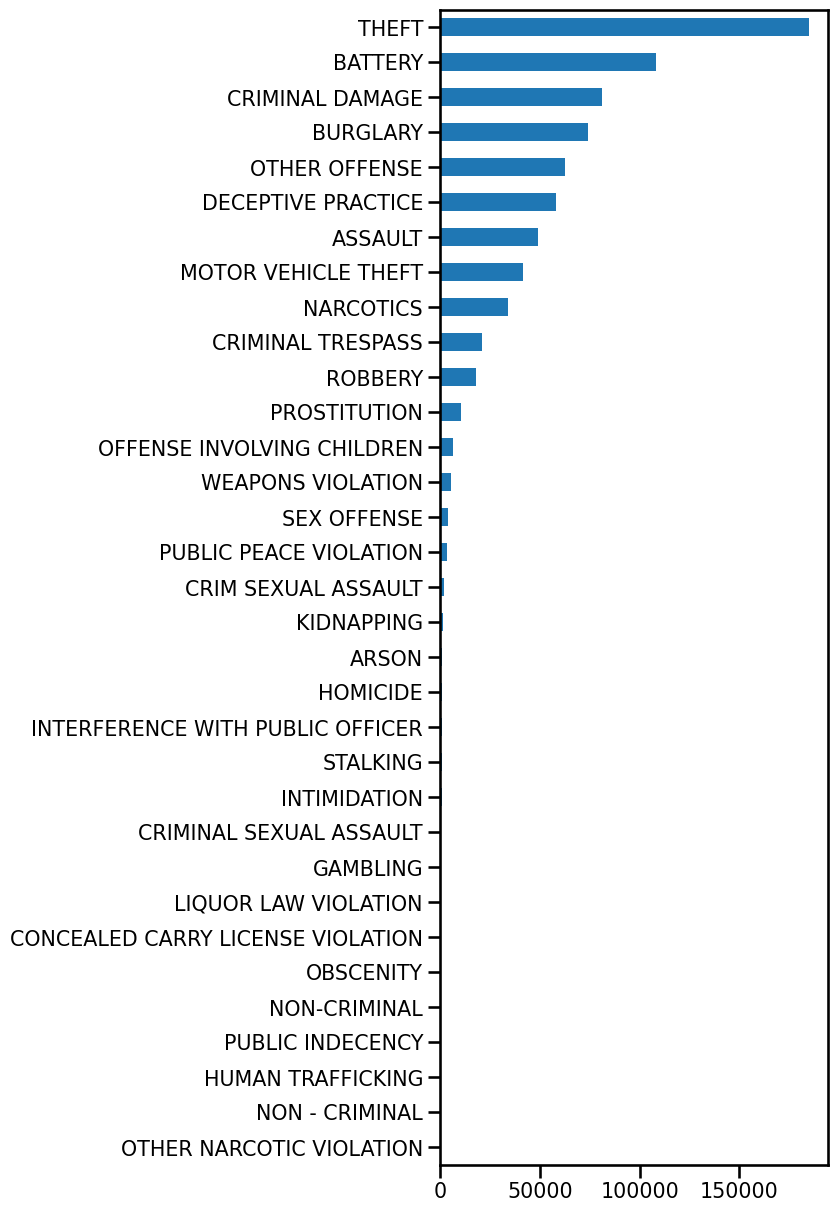

In [633]:
top_am_crims=am_rush_hour['Primary Type'].value_counts()
top_am_crims.sort_values().plot(kind= 'barh',figsize= (5,15))

<Axes: >

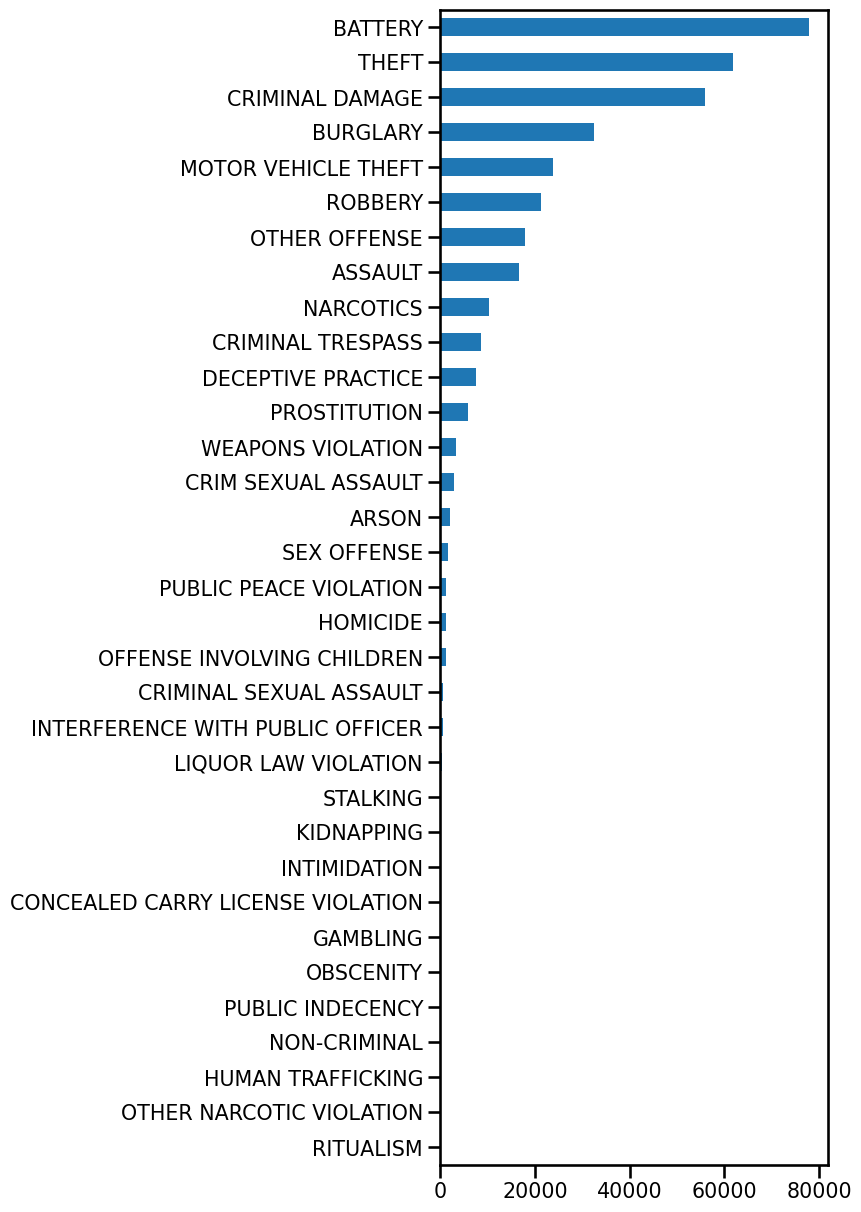

In [634]:
top_pm_crims= pm_rush_hour['Primary Type'].value_counts()
top_pm_crims.sort_values().plot(kind= 'barh',figsize= (5,15))

In [635]:
t=op_pm_crims =pm_rush_hour.value_counts().head()

In [636]:
am_motor_vehicle_thefts = am_rush_hour[am_rush_hour['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]
pm_motor_vehicle_thefts =  pm_rush_hour[pm_rush_hour['Primary Type']=='MOTOR VEHICLE THEFT'].shape[0]

print(f"Number of vehicle thefts during morning rush hour: {am_motor_vehicle_thefts}")
print(f"Number of vehicle thefts during evening rush hour: {pm_motor_vehicle_thefts}")

if am_motor_vehicle_thefts > pm_motor_vehicle_thefts:
 print("Vehicle thefts are more common during the morning rush hour.")
else:
 print("Vehicle thefts are more common during evening rush hour.")

Number of vehicle thefts during morning rush hour: 41578
Number of vehicle thefts during evening rush hour: 23813
Vehicle thefts are more common during the morning rush hour.


# Topic 4) Comparing Months
   * Answer the question: ​What months have the most crime? What months have the least?
   * Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [637]:
combined_df['Month']= combined_df.index.month
combined_df['MonthName'] = combined_df.index.month_name()
month_lookup =dict(zip(combined_df['Month'],combined_df['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

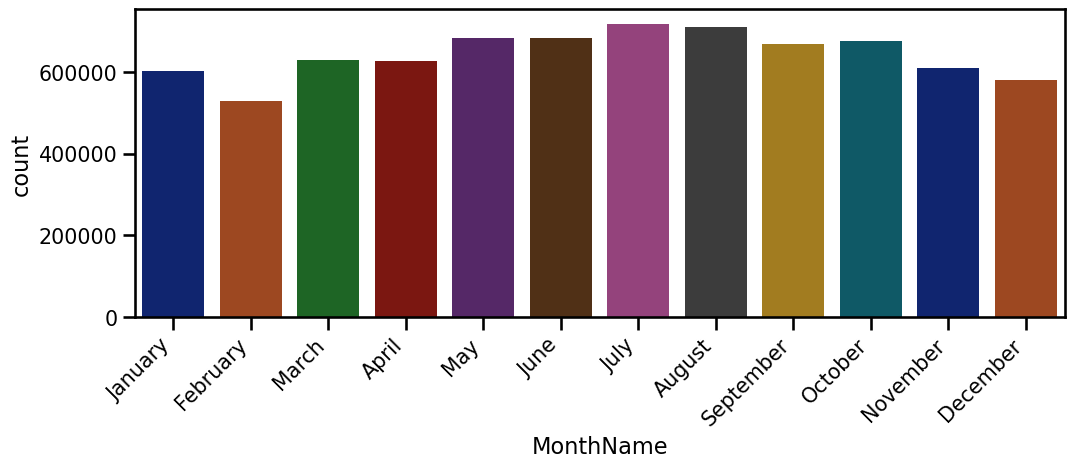

In [638]:
ax = sns.countplot(data=combined_df, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [639]:
most_month_crime=combined_df['MonthName'].value_counts().to_frame('most # month crime')
most_month_crime

most # month crime
July                   717232
August                 710444
May                    682932
June                   681739
October                676285
September              668242
March                  629704
April                  627175
November               608961
January                601236
December               579768
February               529391

In [640]:
## Get # of crimes by month
crimes_by_month = combined_df.groupby('Primary Type')['Month'].value_counts().sort_index()
crimes_by_month



Primary Type       Month
ARSON              1         917
                   2         807
                   3        1111
                   4        1097
                   5        1230
                            ... 
WEAPONS VIOLATION  8        9887
                   9        9435
                   10       9190
                   11       7952
                   12       7401
Name: Month, Length: 415, dtype: int64

In [641]:
plot_month=crimes_by_month.to_frame('of crimes').reset_index()
plot_month

Primary Type  Month  of crimes
0                ARSON      1        917
1                ARSON      2        807
2                ARSON      3       1111
3                ARSON      4       1097
4                ARSON      5       1230
..                 ...    ...        ...
410  WEAPONS VIOLATION      8       9887
411  WEAPONS VIOLATION      9       9435
412  WEAPONS VIOLATION     10       9190
413  WEAPONS VIOLATION     11       7952
414  WEAPONS VIOLATION     12       7401

[415 rows x 3 columns]

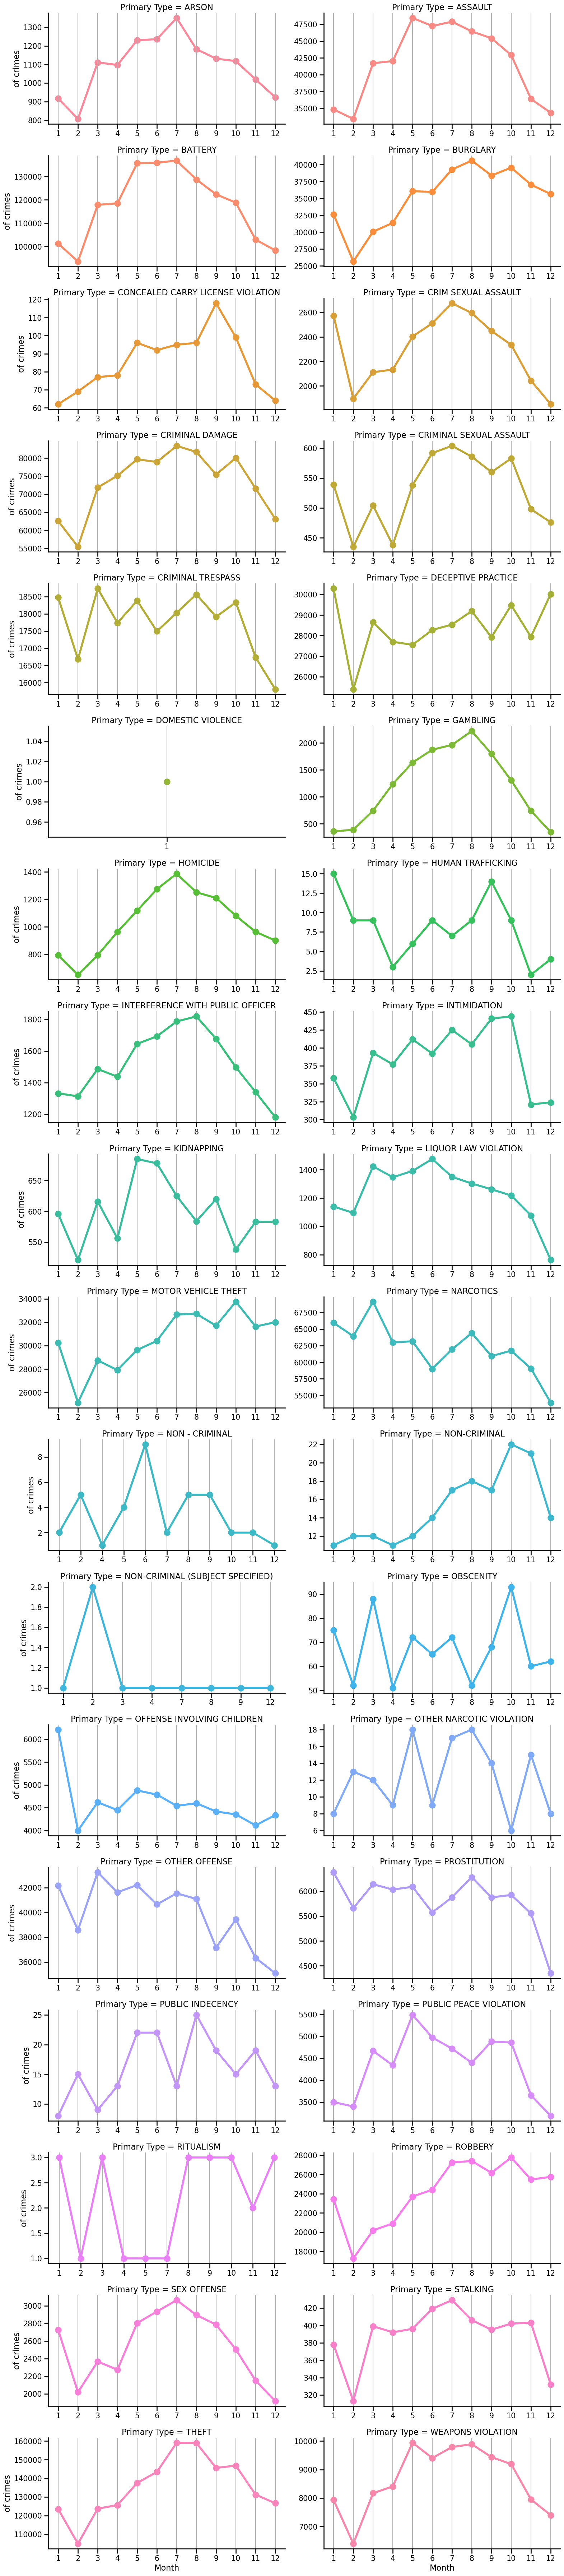

In [642]:
g = sns.catplot(data=plot_month, x='Month', y='of crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];




# Topic 5) Comparing Holidays:
 *  Answer the question: ​What are the top 3 holidays with the largest number of crimes?
 * Answer the question:  For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [643]:
!pip install holidays
import holidays
import datetime as dt
from holidays import country_holidays



In [644]:
combined_df['date'] = combined_df.index.date
combined_df

Primary Type          Location Description  Arrest  \
Date                                                                            
2001-01-01 01:00:00             BATTERY                     RESIDENCE   False   
2001-01-01 13:00:00             BATTERY                     RESIDENCE   False   
2001-01-01 13:00:00            GAMBLING                        STREET    True   
2001-01-01 01:00:00     CRIMINAL DAMAGE                        STREET   False   
2001-01-01 01:00:00             BATTERY       RESIDENCE PORCH/HALLWAY   False   
...                                 ...                           ...     ...   
2022-12-31 12:50:00             ASSAULT                     APARTMENT   False   
2022-12-31 12:50:00             ASSAULT                     APARTMENT   False   
2022-12-31 00:52:00             BATTERY                    BARBERSHOP   False   
2022-12-31 12:52:00             ASSAULT  COMMERCIAL / BUSINESS OFFICE   False   
2022-12-31 12:59:00  DECEPTIVE PRACTICE                     RESIDENCE   False   

                     District  Years  Hourofday  Month MonthName        date  
Date                                                                          
2001-01-01 01:00:00      16.0   2001          1      1   January  2001-01-01  
2001-01-01 13:00:00       8.0   2001         13      1   January  2001-01-01  
2001-01-01 13:00:00       3.0   2001         13      1   January  2001-01-01  
2001-01-01 01:00:00      24.0   2001          1      1   January  2001-01-01  
2001-01-01 01:00:00       2.0   2001          1      1   January  2001-01-01  
...                       ...    ...        ...    ...       ...         ...  
2022-12-31 12:50:00      10.0   2022         12     12  December  2022-12-31  
2022-12-31 12:50:00       7.0   2022         12     12  December  2022-12-31  
2022-12-31 00:52:00      11.0   2022          0     12  December  2022-12-31  
2022-12-31 12:52:00      14.0   2022         12     12  December  2022-12-31  
2022-12-31 12:59:00      15.0   2022         12     12  December  2022-12-31  

[7713109 rows x 9 columns]

In [645]:
## making a date range that covers full dataset
all_days = pd.date_range(combined_df["date"].min(), combined_df["date"].max())
all_days



DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [646]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])


2001-01-01 00:00:00


"New Year's Day"

In [647]:
combined_df["US Holiday"] = [us_holidays.get(day) for day in combined_df['date']]

combined_df["US Holiday"] 

Date
2001-01-01 01:00:00    New Year's Day
2001-01-01 13:00:00    New Year's Day
2001-01-01 13:00:00    New Year's Day
2001-01-01 01:00:00    New Year's Day
2001-01-01 01:00:00    New Year's Day
                            ...      
2022-12-31 12:50:00              None
2022-12-31 12:50:00              None
2022-12-31 00:52:00              None
2022-12-31 12:52:00              None
2022-12-31 12:59:00              None
Name: US Holiday, Length: 7713109, dtype: object

* ​What are the top 3 holidays with the largest number of crimes?

In [648]:
holiday_crimes =  combined_df.groupby('US Holiday')['Primary Type'].size()
top3_holidays= holiday_crimes.head(3).to_frame('# of Crimes')
top3_holidays

# of Crimes
US Holiday                           
Christmas Day                   12418
Christmas Day (Observed)         4929
Columbus Day                    20920

In [649]:
holiday_crimes_value=  combined_df.groupby('US Holiday')['Primary Type'].value_counts()
holiday_crimes_value= holiday_crimes_value.to_frame('crimes')
holiday_crimes_value

crimes
US Holiday            Primary Type                             
Christmas Day         BATTERY                              3431
                      THEFT                                1869
                      CRIMINAL DAMAGE                      1743
                      ASSAULT                               883
                      OTHER OFFENSE                         854
...                                                         ...
Washington's Birthday GAMBLING                               12
                      KIDNAPPING                             11
                      INTIMIDATION                           10
                      STALKING                                9
                      CONCEALED CARRY LICENSE VIOLATION       4

[443 rows x 1 columns]

In [650]:
# top 3 holidays with the most crime


top_holidys= ['Christmas Day','Christmas Day (Observed)','Columbus Day']
result_data = []
for day in top_holidys:
    data=holiday_crimes_value.loc[day].head(5)
    result_data.append(data)
    
final_result = pd.concat(result_data,keys=top_holidys, names=['US Holiday', 'Primary Type'])
final_result

crimes
US Holiday               Primary Type           
Christmas Day            BATTERY            3431
                         THEFT              1869
                         CRIMINAL DAMAGE    1743
                         ASSAULT             883
                         OTHER OFFENSE       854
Christmas Day (Observed) THEFT              1013
                         BATTERY             886
                         CRIMINAL DAMAGE     593
                         NARCOTICS           390
                         BURGLARY            360
Columbus Day             THEFT              4544
                         BATTERY            3534
                         CRIMINAL DAMAGE    2509
                         NARCOTICS          2007
                         OTHER OFFENSE      1344

<Axes: xlabel='US Holiday,Primary Type'>

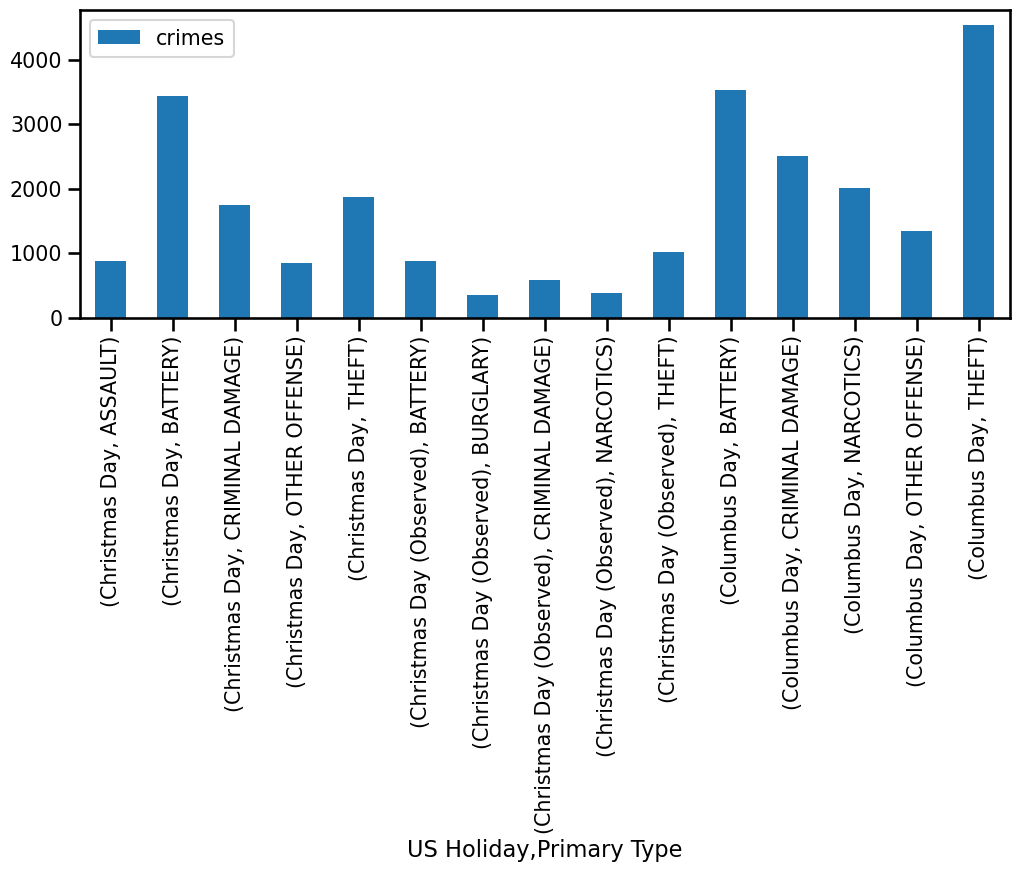

In [651]:
final_result.sort_index().plot(kind= 'bar')

# time series

* For this phase of the project, you will be helping Chicago law enforcement allocate resources for the next 6 months.

## func 

In [652]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [653]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [654]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [655]:
def get_sig_lags(ts, type='ACF',  nlags=None,alpha=0.5):
    

    if type == 'ACF':
        # Running the function used by plot_acf
        corr_values, conf_int = tsa.stattools.acf(ts, alpha=alpha, nlags=nlags)
        
    elif type=='PACF':
        corr_values, conf_int = tsa.stattools.pacf(ts, alpha=alpha, nlags=nlags)
        
    else: 
        raise Exception("type must be either 'ACF' or 'PACF'")
        
    # Determine lags
    lags =range(len(corr_values))
    
    # Create a centered version of the acf_df 
    corr_df = pd.DataFrame({type:corr_values,
                            'Lags':lags,
                            'lower ci': conf_int[:,0]-corr_values, # subtract acf from lower ci to center
                            'upper ci': conf_int[:,1]-corr_values, # subtact acf to upper ci to center
                                 })
    corr_df = corr_df.set_index("Lags")
    
    # Getting filter for sig lags
    filter_sig_lags = (corr_df[type] < corr_df['lower ci']) | (corr_df[type] > corr_df['upper ci'])

    # Get lag #'s 
    sig_lags= corr_df.index[filter_sig_lags]
    sig_lags = sig_lags[sig_lags!=0]

    return sig_lags


In [656]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig


## the crime  forecast

In [657]:
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs
import pmdarima as pm  

In [658]:
# Assuming crims_data is your DataFrame with a datetime index
crims_data = crims_data.asfreq('M')

# Get the size of the DataFrame
num_rows = crims_data.shape[0]

print(f'The number of rows after resampling to monthly frequency is: {num_rows}')



The number of rows after resampling to monthly frequency is: 264


### THEFT 

In [659]:
ts = crims_data['THEFT']
print(f'the n null value =  {ts.isna().sum()}')

the n null value =  0


In [660]:
# check frequency 
ts.index

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', length=264, freq='M')

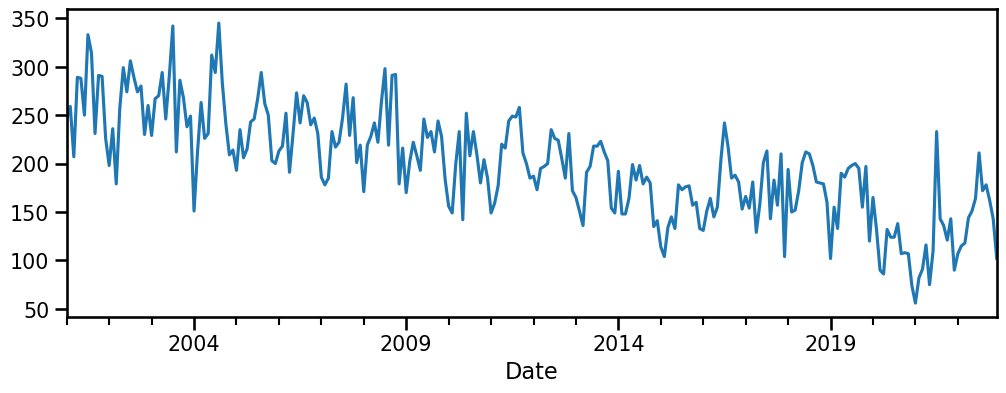

In [661]:
# Visualize selected time series
ax = ts.plot()



#### Determine if a seasonal or non-seasonal model is appropriate for the data 

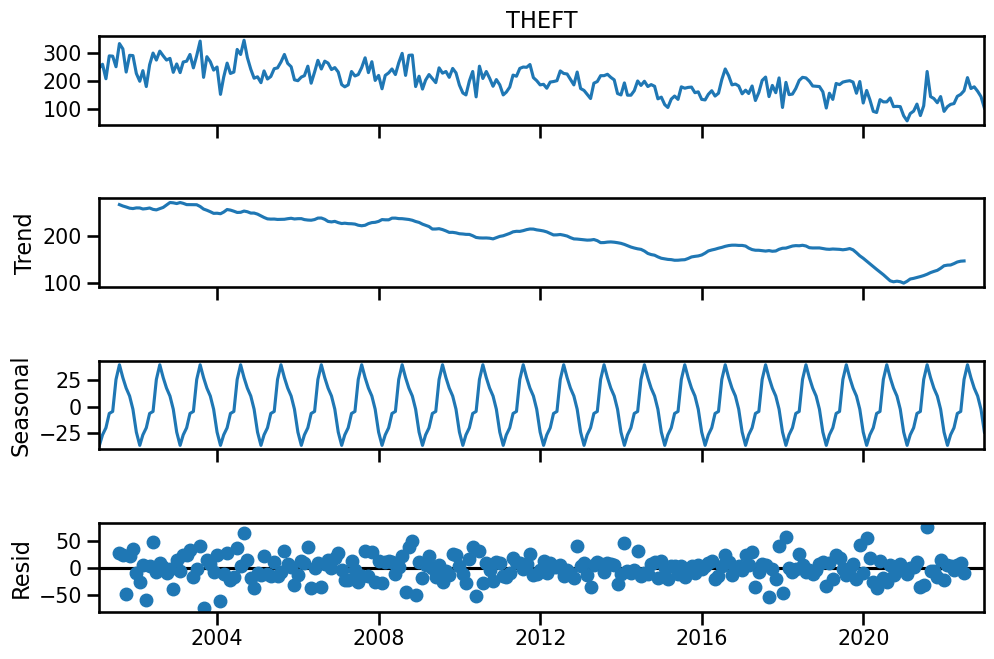

In [662]:
decomp= tsa.seasonal_decompose(ts)
fig  = decomp.plot()
fig.set_size_inches(10,8) 


In [663]:
decomp.seasonal.max()
decomp.seasonal.min()
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(ts.max()-ts.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 75.81150793650792 which is ~26.23% of the variation in time series.


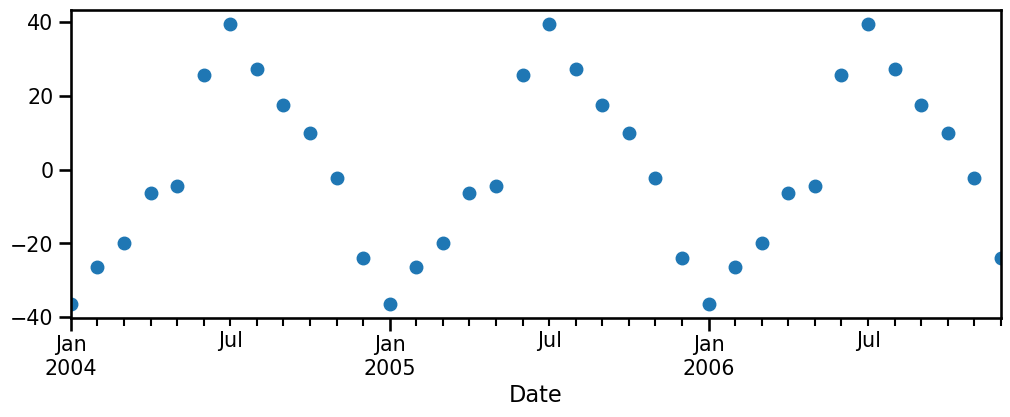

In [664]:
# zooming in on smaller time period to see length of season =  12 
decomp.seasonal.loc["2004":'2006'].plot(style = 'o');


#### Check Stationarity and determine differencing (d and D)

In [665]:
# Check for stationarity 
get_adfuller_results(ts)

Test Statistic  # of Lags Used  # of Observations   p-value  alpha  \
adfuller       -1.281246              15                248  0.637708   0.05   

          sig/stationary?  
adfuller            False

In [666]:
# Determine differencing
d = ndiffs(ts)
print(f'd is {d}')
D = nsdiffs(ts, m = 12)
print(f'D is {D}')



d is 1
D is 0


In [667]:
# non seasonal differencing
ts_diff = ts.diff().dropna()


#### Check Autocorrelation and Partial Autocorrelation to determine initial orders

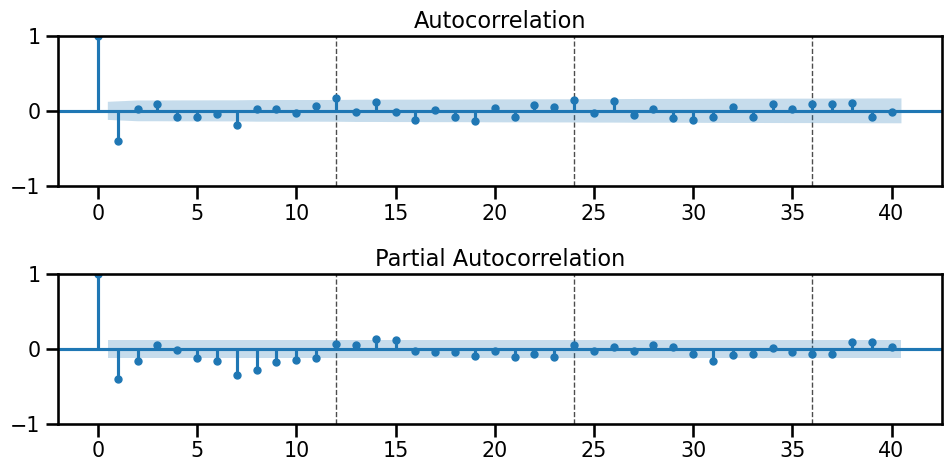

In [668]:
fig  = plot_acf_pacf(ts_diff, annotate_seas=True, m=12)

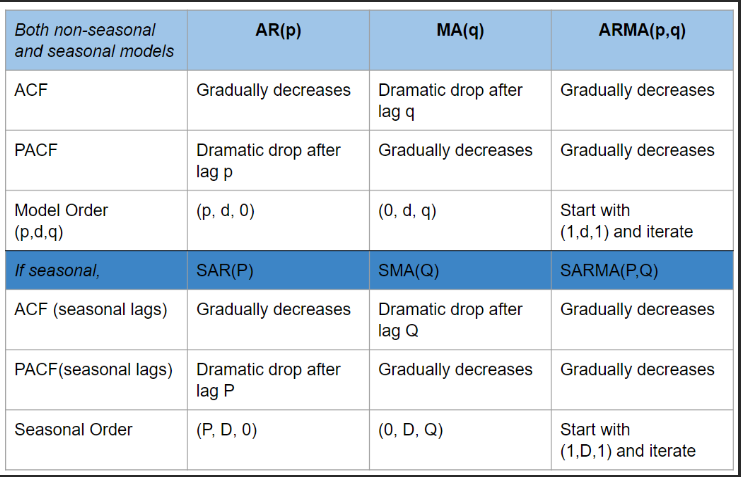

#### try = # pdq =  (1,1,1) ,  # PDQ =(1,0,1)  

#### Split into Training and Test Sets

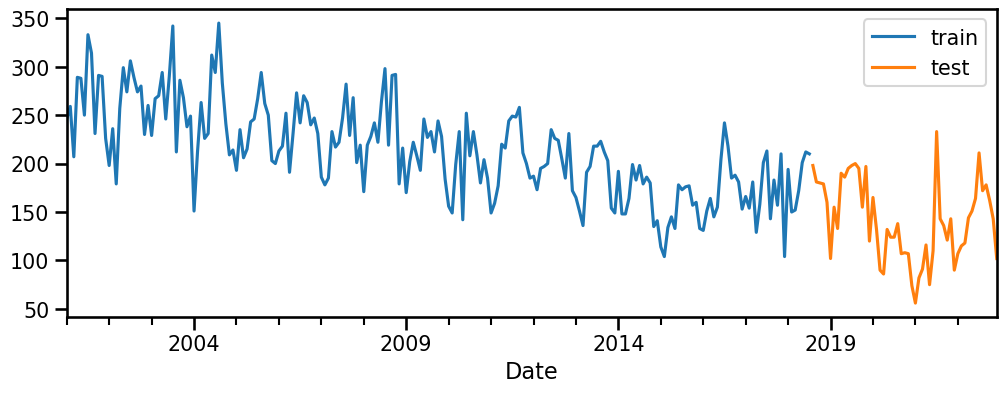

In [669]:
train , test  = train_test_split(ts , test_size=0.2)

ax = train.plot(label="train")
test.plot(label="test")
ax.legend();

In [670]:
# Orders for non seasonal components
p = 0# nonseasonal AR
d = 1  # nonseasonal differencing
q = 1 # nonseasonal MA

# Orders for seasonal components (if seasonal model)
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()



# Obtain summary
sarima.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            THEFT   No. Observations:                  211
Model:             ARIMA(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -999.204
Date:                          Wed, 12 Jun 2024   AIC                           2006.409
Time:                                  12:58:44   BIC                           2019.797
Sample:                              01-31-2001   HQIC                          2011.821
                                   - 07-31-2018                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8777      0.038    -23.388      0.000      -0.951      -0.804
ar.S.L12       0.9845      0.014     72.140      0.000       0.958       1.011
ma.S.L12      -0.8426      0.069    -12.248      0.000      -0.977      -0.708
sigma2       738.2093     75.597      9.765      0.000     590.042     886.376
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                 0.11
Prob(Q):                              0.50   Prob(JB):                         0.95
Heteroskedasticity (H):               0.57   Skew:                            -0.03
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

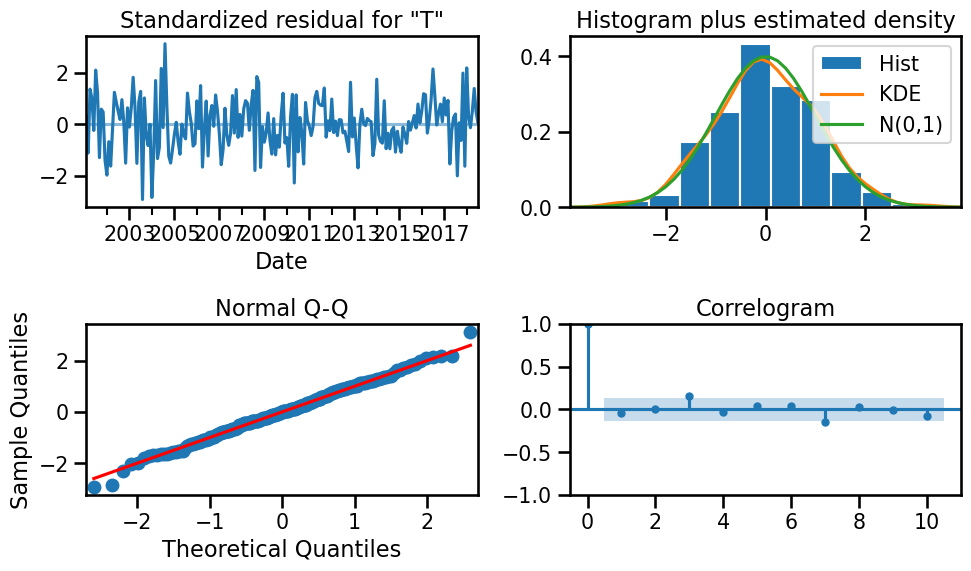

In [671]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()



(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Comparing Forecast vs. True Data'}, xlabel='Date'>)

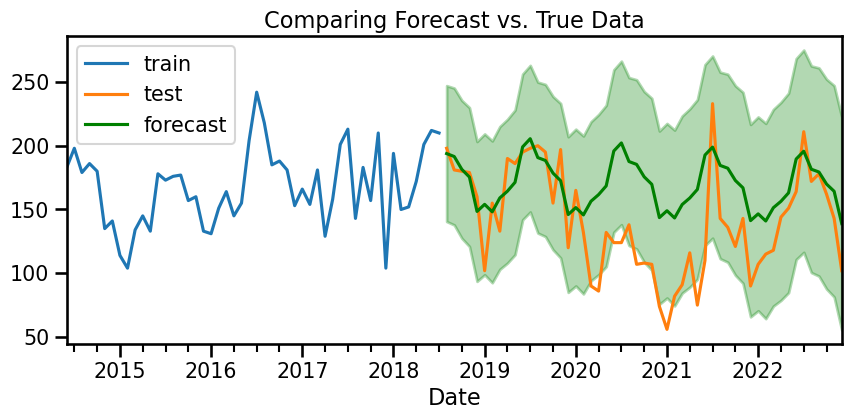

In [672]:
# Obtain summary of forecast as dataframe  
forecast_ts  = sarima.get_forecast(steps = len(test)).summary_frame() 

plot_forecast(train, test, forecast_ts , n_train_lags=50)

In [673]:
regression_metrics_ts(test, forecast_ts['mean'])


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 35.204
- MSE = 1,932.411
- RMSE = 43.959
- R^2 = -0.159
- MAPE = 33.17%


#### itertools 

In [674]:
import itertools
# Define the value or range of values for p, d, q
p_values = range(0, 3)  
d_values =range(0,2)          
q_values = range(0, 3)  
P_values = range (0, 3)
D_values =(0,1) 
Q_values = range (0,3)
m = [12]
# Create combinations of pdq to test
pdqPDQm_to_try = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, m))
# Display first 10 combinations
pdqPDQm_to_try[:40]



[(0, 0, 0, 0, 0, 0, 12),
 (0, 0, 0, 0, 0, 1, 12),
 (0, 0, 0, 0, 0, 2, 12),
 (0, 0, 0, 0, 1, 0, 12),
 (0, 0, 0, 0, 1, 1, 12),
 (0, 0, 0, 0, 1, 2, 12),
 (0, 0, 0, 1, 0, 0, 12),
 (0, 0, 0, 1, 0, 1, 12),
 (0, 0, 0, 1, 0, 2, 12),
 (0, 0, 0, 1, 1, 0, 12),
 (0, 0, 0, 1, 1, 1, 12),
 (0, 0, 0, 1, 1, 2, 12),
 (0, 0, 0, 2, 0, 0, 12),
 (0, 0, 0, 2, 0, 1, 12),
 (0, 0, 0, 2, 0, 2, 12),
 (0, 0, 0, 2, 1, 0, 12),
 (0, 0, 0, 2, 1, 1, 12),
 (0, 0, 0, 2, 1, 2, 12),
 (0, 0, 1, 0, 0, 0, 12),
 (0, 0, 1, 0, 0, 1, 12),
 (0, 0, 1, 0, 0, 2, 12),
 (0, 0, 1, 0, 1, 0, 12),
 (0, 0, 1, 0, 1, 1, 12),
 (0, 0, 1, 0, 1, 2, 12),
 (0, 0, 1, 1, 0, 0, 12),
 (0, 0, 1, 1, 0, 1, 12),
 (0, 0, 1, 1, 0, 2, 12),
 (0, 0, 1, 1, 1, 0, 12),
 (0, 0, 1, 1, 1, 1, 12),
 (0, 0, 1, 1, 1, 2, 12),
 (0, 0, 1, 2, 0, 0, 12),
 (0, 0, 1, 2, 0, 1, 12),
 (0, 0, 1, 2, 0, 2, 12),
 (0, 0, 1, 2, 1, 0, 12),
 (0, 0, 1, 2, 1, 1, 12),
 (0, 0, 1, 2, 1, 2, 12),
 (0, 0, 2, 0, 0, 0, 12),
 (0, 0, 2, 0, 0, 1, 12),
 (0, 0, 2, 0, 0, 2, 12),
 (0, 0, 2, 0, 1, 0, 12)]

In [675]:
# Define starting AIC and MAPE as infinity
best_aic = float("inf")
best_mape = float("inf")

# Define baseline for pdqPDQm
best_pdqPDQm = (0, 0, 0, 0, 0, 0, 0)
# Loop through each combination
for pdqPDQm in pdqPDQm_to_try:
    order = pdqPDQm[:3]  # first three values are non-seasonal (p,d,q)
    seasonal_order = pdqPDQm[3:]  # Remaining values for seasonal (P,D,Q,m)
    
    model = tsa.ARIMA(train, order=order, seasonal_order=seasonal_order)
    try:                         
        result = model.fit()
        print(pdqPDQm, result.aic)      
   
        # If lower AIC is found, replace best AIC with new value
        if result.aic < best_aic:
            forecast_df = result.get_forecast(len(test)).predicted_mean
            mape = mean_absolute_percentage_error(test, forecast_df)
            if mape < best_mape:
                best_aic = result.aic
                best_pdqPDQm = pdqPDQm
                best_mape = mape
                best_model = result
                
    except Exception as e:
        print(f'{pdqPDQm}: caused an error - {str(e)}')

# Print the best orders and AIC score
print("Best AIC:", best_aic)
print("Best pdqPDQm:", best_pdqPDQm)
print("Best MAPE:", best_mape * 100)




(0, 0, 0, 0, 0, 0, 12) 2234.188502350949
(0, 0, 0, 0, 0, 1, 12) 2154.38045083364
(0, 0, 0, 0, 0, 2, 12) 2125.9434532650457
(0, 0, 0, 0, 1, 0, 12) 1982.4188705415777
(0, 0, 0, 0, 1, 1, 12) 1947.5622785644905
(0, 0, 0, 0, 1, 2, 12) 1949.0741614368292
(0, 0, 0, 1, 0, 0, 12) 2089.6091510473143
(0, 0, 0, 1, 0, 1, 12) 2072.5826423871845
(0, 0, 0, 1, 0, 2, 12) 2073.664565985794
(0, 0, 0, 1, 1, 0, 12) 1953.4433369591732
(0, 0, 0, 1, 1, 1, 12) 1949.177783771655
(0, 0, 0, 1, 1, 2, 12) 1940.2691751172547
(0, 0, 0, 2, 0, 0, 12) 2074.1165194760033
(0, 0, 0, 2, 0, 1, 12) 2073.9026073287705
(0, 0, 0, 2, 0, 2, 12) 2058.136178297013
(0, 0, 0, 2, 1, 0, 12) 1948.4147698241159
(0, 0, 0, 2, 1, 1, 12) 1949.224669835925


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 0, 2, 1, 2, 12) 1949.9154920037122
(0, 0, 1, 0, 0, 0, 12) 2163.434595625028
(0, 0, 1, 0, 0, 1, 12) 2117.8173528079906
(0, 0, 1, 0, 0, 2, 12) 2100.866618810461
(0, 0, 1, 0, 1, 0, 12) 1982.3746035513327
(0, 0, 1, 0, 1, 1, 12) 1944.4696447707547
(0, 0, 1, 0, 1, 2, 12) 1946.2423156030977
(0, 0, 1, 1, 0, 0, 12) 2081.623557079336
(0, 0, 1, 1, 0, 1, 12) 2065.5023150354073
(0, 0, 1, 1, 0, 2, 12) 2067.119371711679
(0, 0, 1, 1, 1, 0, 12) 1952.5265113163605
(0, 0, 1, 1, 1, 1, 12) 1946.2850492530877
(0, 0, 1, 1, 1, 2, 12) 1939.2357550750125
(0, 0, 1, 2, 0, 0, 12) 2068.2539055898997
(0, 0, 1, 2, 0, 1, 12) 2067.1979145548376


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 1, 2, 0, 2, 12) 2054.595846694605
(0, 0, 1, 2, 1, 0, 12) 1946.1092465599831
(0, 0, 1, 2, 1, 1, 12) 1947.7951497075605


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 1, 2, 1, 2, 12) 1947.3714185160006
(0, 0, 2, 0, 0, 0, 12) 2139.014251197113
(0, 0, 2, 0, 0, 1, 12) 2106.818536789799
(0, 0, 2, 0, 0, 2, 12) 2092.5802174650707
(0, 0, 2, 0, 1, 0, 12) 1983.5777428432116
(0, 0, 2, 0, 1, 1, 12) 1944.3576639402443
(0, 0, 2, 0, 1, 2, 12) 1946.2147739288534
(0, 0, 2, 1, 0, 0, 12) 2079.227811814523
(0, 0, 2, 1, 0, 1, 12) 2063.8291649893367
(0, 0, 2, 1, 0, 2, 12) 2065.6155706523095
(0, 0, 2, 1, 1, 0, 12) 1953.3184933756402
(0, 0, 2, 1, 1, 1, 12) 1946.239956097087


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 2, 1, 1, 2, 12) 1946.5295447152807
(0, 0, 2, 2, 0, 0, 12) 2066.983116088228
(0, 0, 2, 2, 0, 1, 12) 2065.6530755147965


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 2, 2, 0, 2, 12) 2055.2374940755603
(0, 0, 2, 2, 1, 0, 12) 1946.5629919579294
(0, 0, 2, 2, 1, 1, 12) 1947.8202460243692


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 2, 2, 1, 2, 12) 1947.6757100045395
(0, 1, 0, 0, 0, 0, 12) 2130.812959141466
(0, 1, 0, 0, 0, 1, 12) 2124.3660279353694
(0, 1, 0, 0, 0, 2, 12) 2125.1292736599617
(0, 1, 0, 0, 1, 0, 12) 2086.931254222465
(0, 1, 0, 0, 1, 1, 12) 2021.065230713941
(0, 1, 0, 0, 1, 2, 12) 2022.4556506403935
(0, 1, 0, 1, 0, 0, 12) 2123.10873403741
(0, 1, 0, 1, 0, 1, 12) 2121.9839674392633
(0, 1, 0, 1, 0, 2, 12) 2123.2661496720348
(0, 1, 0, 1, 1, 0, 12) 2052.9255748534206
(0, 1, 0, 1, 1, 1, 12) 2022.5352485647143
(0, 1, 0, 1, 1, 2, 12) 2023.252966008412
(0, 1, 0, 2, 0, 0, 12) 2124.2337567548284
(0, 1, 0, 2, 0, 1, 12) 2123.3454650000212
(0, 1, 0, 2, 0, 2, 12) 2124.284191210247
(0, 1, 0, 2, 1, 0, 12) 2038.21930147303
(0, 1, 0, 2, 1, 1, 12) 2023.9816871483638
(0, 1, 0, 2, 1, 2, 12) 2025.24443935311
(0, 1, 1, 0, 0, 0, 12) 2088.7925868434518
(0, 1, 1, 0, 0, 1, 12) 2061.7052734696713
(0, 1, 1, 0, 0, 2, 12) 2049.383926452354
(0, 1, 1, 0, 1, 0, 12) 1975.6773148855166
(0, 1, 1, 0, 1, 1, 12) 1894.5374486614064
(0, 

C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 1, 2, 1, 1, 2, 12) 1894.9288168262742
(0, 1, 2, 2, 0, 0, 12) 2029.1836724315526
(0, 1, 2, 2, 0, 1, 12) 2009.574026320667


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 1, 2, 2, 0, 2, 12) 2010.1272059540747
(0, 1, 2, 2, 1, 0, 12) 1913.5079574326041
(0, 1, 2, 2, 1, 1, 12) 1896.9497979000719
(0, 1, 2, 2, 1, 2, 12) 1896.7982670525278
(1, 0, 0, 0, 0, 0, 12) 2107.590743830109
(1, 0, 0, 0, 0, 1, 12) 2090.1866654154273
(1, 0, 0, 0, 0, 2, 12) 2083.4276004807184
(1, 0, 0, 0, 1, 0, 12) 1982.0577293636404
(1, 0, 0, 0, 1, 1, 12) 1942.9408354627108
(1, 0, 0, 0, 1, 2, 12) 1944.8018935324958
(1, 0, 0, 1, 0, 0, 12) 2075.905398433044
(1, 0, 0, 1, 0, 1, 12) 2061.503087153383
(1, 0, 0, 1, 0, 2, 12) 2063.3704454630915
(1, 0, 0, 1, 1, 0, 12) 1951.946568733366
(1, 0, 0, 1, 1, 1, 12) 1944.826714322963
(1, 0, 0, 1, 1, 2, 12) 1945.0020617260334
(1, 0, 0, 2, 0, 0, 12) 2065.029811928265
(1, 0, 0, 2, 0, 1, 12) 2063.3931551846576


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 0, 2, 0, 2, 12) 2053.080323378331
(1, 0, 0, 2, 1, 0, 12) 1945.0656038056486
(1, 0, 0, 2, 1, 1, 12) 1946.3851430862364


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 0, 2, 1, 2, 12) 1946.1077332166874
(1, 0, 1, 0, 0, 0, 12) 2091.027981084734
(1, 0, 1, 0, 0, 1, 12) 2068.847114321316
(1, 0, 1, 0, 0, 2, 12) 2060.203217821678


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 1, 0, 1, 0, 12) 1975.92173212032


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 1, 0, 1, 1, 12) 1902.6083300373125


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 1, 0, 1, 2, 12) 1904.53495207055
(1, 0, 1, 1, 0, 0, 12) 2051.959760209518
(1, 0, 1, 1, 0, 1, 12) 2020.4447240224158
(1, 0, 1, 1, 0, 2, 12) 2022.4370591991562


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 1, 1, 1, 0, 12) 1937.352329483622


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 1, 1, 1, 1, 12) 1904.5409992992668


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 1, 1, 1, 2, 12) 1905.0869352805512
(1, 0, 1, 2, 0, 0, 12) 2037.9752538837126
(1, 0, 1, 2, 0, 1, 12) 2022.4378005861408


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 1, 2, 0, 2, 12) 2022.8883823062451
(1, 0, 1, 2, 1, 0, 12) 1921.839047789268


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 1, 2, 1, 1, 12) 1906.3265073728858


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 1, 2, 1, 2, 12) 1907.057897880487
(1, 0, 2, 0, 0, 0, 12) 2089.2731691630925
(1, 0, 2, 0, 0, 1, 12) 2069.4451855699413
(1, 0, 2, 0, 0, 2, 12) 2059.2995799745613
(1, 0, 2, 0, 1, 0, 12) 1975.1062316727925
(1, 0, 2, 0, 1, 1, 12) 1900.350575565284
(1, 0, 2, 0, 1, 2, 12) 1902.3503961630058
(1, 0, 2, 1, 0, 0, 12) 2053.5183775750506
(1, 0, 2, 1, 0, 1, 12) 2021.1478832131916
(1, 0, 2, 1, 0, 2, 12) 2023.1475359644833
(1, 0, 2, 1, 1, 0, 12) 1935.0418614287364
(1, 0, 2, 1, 1, 1, 12) 1902.3504035778642
(1, 0, 2, 1, 1, 2, 12) 1902.8346163647118


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 2, 2, 0, 0, 12) 2039.6351976397382
(1, 0, 2, 2, 0, 1, 12) 2023.1475333949331


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 2, 2, 0, 2, 12) 2023.5891752284174
(1, 0, 2, 2, 1, 0, 12) 1918.197322409791
(1, 0, 2, 2, 1, 1, 12) 1904.2674058847692


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 2, 2, 1, 2, 12) 1904.6323369820843
(1, 1, 0, 0, 0, 0, 12) 2094.704464063332
(1, 1, 0, 0, 0, 1, 12) 2081.821241391576
(1, 1, 0, 0, 0, 2, 12) 2079.9388052173217
(1, 1, 0, 0, 1, 0, 12) 2032.4392064435583
(1, 1, 0, 0, 1, 1, 12) 1959.0303733110404
(1, 1, 0, 0, 1, 2, 12) 1959.8985472081713
(1, 1, 0, 1, 0, 0, 12) 2077.4728148112945
(1, 1, 0, 1, 0, 1, 12) 2065.5469061828394
(1, 1, 0, 1, 0, 2, 12) 2066.4890125260254
(1, 1, 0, 1, 1, 0, 12) 1997.2097517616917
(1, 1, 0, 1, 1, 1, 12) 1960.026329378502


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 0, 1, 1, 2, 12) 1961.4621287920895
(1, 1, 0, 2, 0, 0, 12) 2075.718169259939
(1, 1, 0, 2, 0, 1, 12) 2066.581142936013


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 0, 2, 0, 2, 12) 2067.946659339693
(1, 1, 0, 2, 1, 0, 12) 1982.0357627907383
(1, 1, 0, 2, 1, 1, 12) 1961.829179153004


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 0, 2, 1, 2, 12) 1963.0725175952427
(1, 1, 1, 0, 0, 0, 12) 2071.3044170701846
(1, 1, 1, 0, 0, 1, 12) 2051.134185235555
(1, 1, 1, 0, 0, 2, 12) 2044.2683765190072
(1, 1, 1, 0, 1, 0, 12) 1977.263351088135
(1, 1, 1, 0, 1, 1, 12) 1893.3539601150815
(1, 1, 1, 0, 1, 2, 12) 1895.319173114005
(1, 1, 1, 1, 0, 0, 12) 2039.2280456368871
(1, 1, 1, 1, 0, 1, 12) 2007.657085907811
(1, 1, 1, 1, 0, 2, 12) 2009.6184173608317
(1, 1, 1, 1, 1, 0, 12) 1933.5762550707564
(1, 1, 1, 1, 1, 1, 12) 1895.3211548867541


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 1, 1, 1, 2, 12) 1895.9123406310973
(1, 1, 1, 2, 0, 0, 12) 2029.1595569150297
(1, 1, 1, 2, 0, 1, 12) 2009.6212414794768


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 1, 2, 0, 2, 12) 2010.1780831319352
(1, 1, 1, 2, 1, 0, 12) 1915.1276509624417
(1, 1, 1, 2, 1, 1, 12) 1897.217046620605
(1, 1, 1, 2, 1, 2, 12) 1897.851934330046
(1, 1, 2, 0, 0, 0, 12) 2070.114972992198
(1, 1, 2, 0, 0, 1, 12) 2049.567229086415
(1, 1, 2, 0, 0, 2, 12) 2042.9728156923247
(1, 1, 2, 0, 1, 0, 12) 1973.8100275374272
(1, 1, 2, 0, 1, 1, 12) 1894.0215512923112
(1, 1, 2, 0, 1, 2, 12) 1896.0211789983778
(1, 1, 2, 1, 0, 0, 12) 2042.3753402314214
(1, 1, 2, 1, 0, 1, 12) 2009.599828736535
(1, 1, 2, 1, 0, 2, 12) 2012.2165786633382
(1, 1, 2, 1, 1, 0, 12) 1935.6251595740719
(1, 1, 2, 1, 1, 1, 12) 1896.021197479659
(1, 1, 2, 1, 1, 2, 12) 1896.576566341923
(1, 1, 2, 2, 0, 0, 12) 2029.8399633964043
(1, 1, 2, 2, 0, 1, 12) 2012.223943763001


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 2, 2, 0, 2, 12) 2012.131282675985
(1, 1, 2, 2, 1, 0, 12) 1918.8221678118844
(1, 1, 2, 2, 1, 1, 12) 1898.7267823610227
(1, 1, 2, 2, 1, 2, 12) 1898.3875876871039
(2, 0, 0, 0, 0, 0, 12) 2090.747617168133
(2, 0, 0, 0, 0, 1, 12) 2073.158458617494
(2, 0, 0, 0, 0, 2, 12) 2067.9303960985694
(2, 0, 0, 0, 1, 0, 12) 1982.2019650708794
(2, 0, 0, 0, 1, 1, 12) 1938.1834692448767
(2, 0, 0, 0, 1, 2, 12) 1940.1802857400498
(2, 0, 0, 1, 0, 0, 12) 2063.467612040774
(2, 0, 0, 1, 0, 1, 12) 2050.9421759528077
(2, 0, 0, 1, 0, 2, 12) 2052.9120543299464
(2, 0, 0, 1, 1, 0, 12) 1950.8591040083784
(2, 0, 0, 1, 1, 1, 12) 1940.1807720083284


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 0, 1, 1, 2, 12) 1940.385404652731
(2, 0, 0, 2, 0, 0, 12) 2056.444913813734
(2, 0, 0, 2, 0, 1, 12) 2052.9156981076735


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 0, 2, 0, 2, 12) 2053.289472574925
(2, 0, 0, 2, 1, 0, 12) 1942.3744580927664
(2, 0, 0, 2, 1, 1, 12) 1941.8065692158177


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 0, 2, 1, 2, 12) 1942.0536592920519
(2, 0, 1, 0, 0, 0, 12) 2091.451799111935
(2, 0, 1, 0, 0, 1, 12) 2070.2779600912654
(2, 0, 1, 0, 0, 2, 12) 2057.8591448185502


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 0, 1, 0, 12) 1976.18759738965


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 0, 1, 1, 12) 1901.398036138458


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 0, 1, 2, 12) 1903.3830591713254
(2, 0, 1, 1, 0, 0, 12) 2052.7879370624087
(2, 0, 1, 1, 0, 1, 12) 2021.3613806057506
(2, 0, 1, 1, 0, 2, 12) 2023.3612155198414


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 1, 1, 0, 12) 1936.7381352148184


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 1, 1, 1, 12) 1904.3887318652955


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 1, 1, 1, 2, 12) 1903.9093382747344
(2, 0, 1, 2, 0, 0, 12) 2039.7044452635855
(2, 0, 1, 2, 0, 1, 12) 2023.3612137797732


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 2, 0, 2, 12) 2023.82188210515
(2, 0, 1, 2, 1, 0, 12) 1920.606847394331


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 2, 1, 1, 12) 1905.2718844407707


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 1, 2, 1, 2, 12) 1905.8084957012209
(2, 0, 2, 0, 0, 0, 12) 2084.2417090320123
(2, 0, 2, 0, 0, 1, 12) 2067.8484550328185
(2, 0, 2, 0, 0, 2, 12) 2063.3716952085015
(2, 0, 2, 0, 1, 0, 12) 1976.0094127048635
(2, 0, 2, 0, 1, 1, 12) 1904.4816888805235


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 0, 1, 2, 12) 1906.7742598479317


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 1, 0, 0, 12) 2054.628903135377
(2, 0, 2, 1, 0, 1, 12) 2023.068733186682


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 1, 0, 2, 12) 2025.0673507370777
(2, 0, 2, 1, 1, 0, 12) 1939.7864285457672


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 1, 1, 1, 12) 1906.8194032022734
(2, 0, 2, 1, 1, 2, 12) 1906.990067368622


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 2, 0, 0, 12) 2041.5794196589582
(2, 0, 2, 2, 0, 1, 12) 2025.0670904589301


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 2, 0, 2, 12) 2025.5181738396523
(2, 0, 2, 2, 1, 0, 12) 1924.945233101484


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 2, 1, 1, 12) 1908.1686509111378


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 2, 1, 2, 12) 1909.5754718130036
(2, 1, 0, 0, 0, 0, 12) 2089.7069788906565
(2, 1, 0, 0, 0, 1, 12) 2066.993573366151
(2, 1, 0, 0, 0, 2, 12) 2061.3153176320784
(2, 1, 0, 0, 1, 0, 12) 1988.6693034397283
(2, 1, 0, 0, 1, 1, 12) 1912.957385613341
(2, 1, 0, 0, 1, 2, 12) 1914.6273631938961
(2, 1, 0, 1, 0, 0, 12) 2053.719022470261
(2, 1, 0, 1, 0, 1, 12) 2025.8238583167927
(2, 1, 0, 1, 0, 2, 12) 2027.5278873528437
(2, 1, 0, 1, 1, 0, 12) 1949.3986381104055
(2, 1, 0, 1, 1, 1, 12) 1914.6544584384465
(2, 1, 0, 1, 1, 2, 12) 1913.9766097424604
(2, 1, 0, 2, 0, 0, 12) 2043.6043754165494
(2, 1, 0, 2, 0, 1, 12) 2027.5550067227325


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 0, 2, 0, 2, 12) 2026.9380243271858
(2, 1, 0, 2, 1, 0, 12) 1926.8844094731553
(2, 1, 0, 2, 1, 1, 12) 1916.4878946695453
(2, 1, 0, 2, 1, 2, 12) 1915.9487688257013
(2, 1, 1, 0, 0, 0, 12) 2090.9097421557285
(2, 1, 1, 0, 0, 1, 12) 2068.8803167619485
(2, 1, 1, 0, 0, 2, 12) 2043.0304686811016
(2, 1, 1, 0, 1, 0, 12) 1976.0171611510323
(2, 1, 1, 0, 1, 1, 12) 1891.8583476931003
(2, 1, 1, 0, 1, 2, 12) 1893.8532796107106
(2, 1, 1, 1, 0, 0, 12) 2038.458389251366
(2, 1, 1, 1, 0, 1, 12) 2009.0726609939734
(2, 1, 1, 1, 0, 2, 12) 2011.0726388542776
(2, 1, 1, 1, 1, 0, 12) 1930.498165781331
(2, 1, 1, 1, 1, 1, 12) 1893.8535276526181
(2, 1, 1, 1, 1, 2, 12) 1895.6836221280857
(2, 1, 1, 2, 0, 0, 12) 2030.3667500107704
(2, 1, 1, 2, 0, 1, 12) 2011.0726404858565


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 1, 2, 0, 2, 12) 2011.540357952906
(2, 1, 1, 2, 1, 0, 12) 1909.1263074995777
(2, 1, 1, 2, 1, 1, 12) 1895.7824716603004
(2, 1, 1, 2, 1, 2, 12) 1895.7496264867857
(2, 1, 2, 0, 0, 0, 12) 2092.591540583724
(2, 1, 2, 0, 0, 1, 12) 2054.3263536855225
(2, 1, 2, 0, 0, 2, 12) 2048.0234163452405
(2, 1, 2, 0, 1, 0, 12) 1974.9803937552476
(2, 1, 2, 0, 1, 1, 12) 1892.9007868059107


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2, 0, 1, 2, 12) 1894.898096045063
(2, 1, 2, 1, 0, 0, 12) 2042.975448941161
(2, 1, 2, 1, 0, 1, 12) 2009.1851528710124
(2, 1, 2, 1, 0, 2, 12) 2013.496357018471
(2, 1, 2, 1, 1, 0, 12) 1930.543012203525
(2, 1, 2, 1, 1, 1, 12) 1894.8982455853807


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2, 1, 1, 2, 12) 1896.9015827215267
(2, 1, 2, 2, 0, 0, 12) 2031.3254827669803


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2, 2, 0, 1, 12) 2011.1863332048301


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2, 2, 0, 2, 12) 2011.7895971596895
(2, 1, 2, 2, 1, 0, 12) 1909.233455453637
(2, 1, 2, 2, 1, 1, 12) 1896.8079376864052


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2, 2, 1, 2, 12) 1896.773353930214
Best AIC: 1940.2691751172547
Best pdqPDQm: (0, 0, 0, 1, 1, 2, 12)
Best MAPE: 26.40835725157395


In [676]:
#Best AIC: 1940.2691751172547
#Best pdqPDQm: (0, 0, 0, 1, 1, 2, 12)
# Best MAPE: 26.40835725157395

# Orders for non seasonal components
p = 0  # nonseasonal AR
d = 0  # nonseasonal differencing
q = 0 # nonseasonal MA

# Orders for seasonal components (if seasonal model)
P = 1  # Seasonal AR
D =1  # Seasonal differencing
Q = 2  # Seasonal MA
m = 12 # Seasonal period

sarima_best = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()



# Obtain summary
sarima_best.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:                       THEFT   No. Observations:                  211
Model:             ARIMA(1, 1, [1, 2], 12)   Log Likelihood                -966.135
Date:                     Wed, 12 Jun 2024   AIC                           1940.269
Time:                             13:04:54   BIC                           1953.442
Sample:                         01-31-2001   HQIC                          1945.601
                              - 07-31-2018                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9473      0.054     17.446      0.000       0.841       1.054
ma.S.L12      -1.6276      0.110    -14.848      0.000      -1.842      -1.413
ma.S.L24       0.7072      0.098      7.236      0.000       0.516       0.899
sigma2       892.0619    116.797      7.638      0.000     663.145    1120.979
===================================================================================
Ljung-Box (L1) (Q):                   1.58   Jarque-Bera (JB):                 1.60
Prob(Q):                              0.21   Prob(JB):                         0.45
Heteroskedasticity (H):               0.74   Skew:                             0.16
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Comparing Forecast vs. True Data'}, xlabel='Date'>)

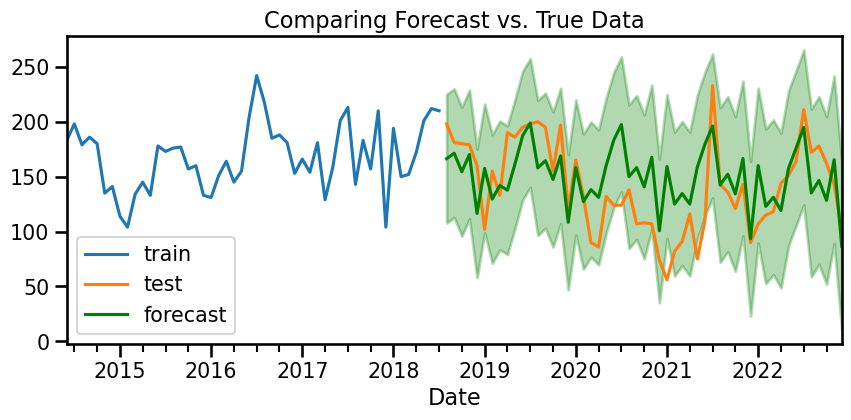

In [677]:
# Obtain summary of forecast as dataframe  
forecast_ts  = sarima_best.get_forecast(steps = len(test)).summary_frame() 

plot_forecast(train, test, forecast_ts , n_train_lags=50)

In [678]:
regression_metrics_ts(test, forecast_ts['mean'])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 29.871
- MSE = 1,397.167
- RMSE = 37.379
- R^2 = 0.162
- MAPE = 26.41%


#### Grid Search Orders with pmdarima

In [679]:
import pmdarima as pm
# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  # True or False
    m=12,  # if seasonal
    trace=True
)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2013.381, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2132.809, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2079.460, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2130.813, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2015.393, Time=1.94 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2094.581, Time=0.26 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2033.211, Time=1.26 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0

In [680]:
# Try auto_arima orders
sarima_auto = tsa.ARIMA(train, order = auto_model.order, seasonal_order=auto_model.seasonal_order).fit()

# Obtain summary
sarima_auto.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            THEFT   No. Observations:                  211
Model:             ARIMA(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -999.204
Date:                          Wed, 12 Jun 2024   AIC                           2006.409
Time:                                  13:06:00   BIC                           2019.797
Sample:                              01-31-2001   HQIC                          2011.821
                                   - 07-31-2018                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8777      0.038    -23.388      0.000      -0.951      -0.804
ar.S.L12       0.9845      0.014     72.140      0.000       0.958       1.011
ma.S.L12      -0.8426      0.069    -12.248      0.000      -0.977      -0.708
sigma2       738.2093     75.597      9.765      0.000     590.042     886.376
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                 0.11
Prob(Q):                              0.50   Prob(JB):                         0.95
Heteroskedasticity (H):               0.57   Skew:                            -0.03
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

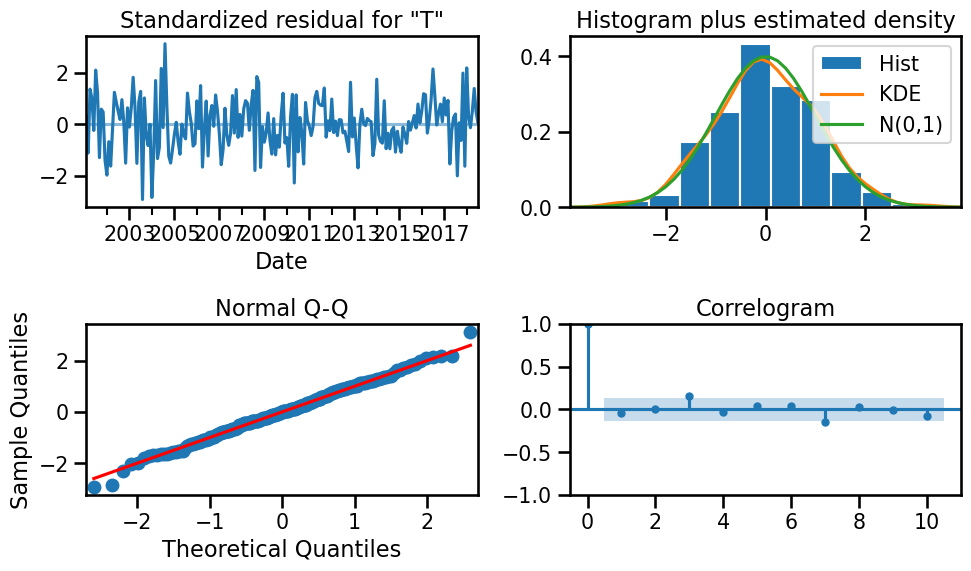

In [681]:
# Obtain diagnostic plots
fig = sarima_auto.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()


(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Comparing Forecast vs. True Data'}, xlabel='Date'>)

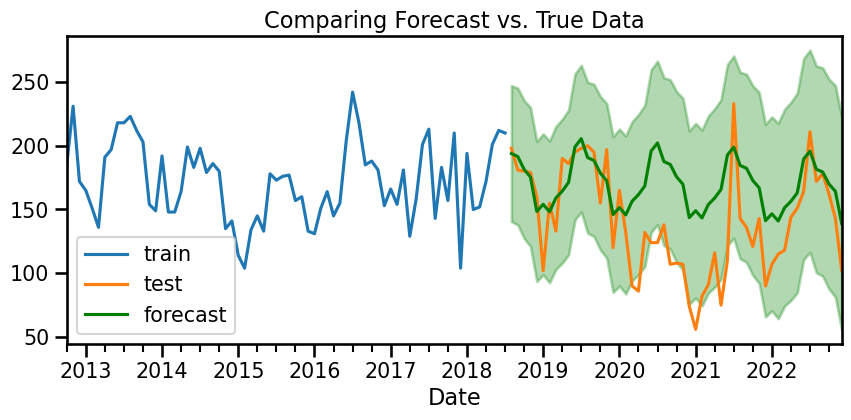

In [682]:
# Obtain summary of forecast as dataframe  
forecast_ts_auto  = sarima_auto.get_forecast(steps = len(test)).summary_frame() 

plot_forecast(train, test, forecast_ts_auto , n_train_lags=70)

In [683]:
regression_metrics_ts(test, forecast_ts_auto['mean'])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 35.204
- MSE = 1,932.411
- RMSE = 43.959
- R^2 = -0.159
- MAPE = 33.17%


* Model Comparison and Final Recommendations
     * Model 1: ARIMA(0, 1, 1)x(1, 0, 1, 12)
          - MAE: 35.204
          - MSE: 1,932.411
          - RMSE: 43.959
          - R^2: -0.159
          - MAPE: 33.17%
      
 
    * Model 2: ARIMA(0, 0, 0, 1, 1, 2, 12)(Selected Model)
         - MAE: 29.87
         - MSE: 1,397.176
         - RMSE: 37.379 
         - R^2: 0.162
         - MAPE: 26.41%


  
    * Model 3: Auto-ARIMA 
        - MAE: 35.204
         - MSE: 1,932.411
         - RMSE: 43.959
         - R^2: -0.159
        - MAPE: 33.17%

#### Analysis
* Based on the regression metrics, Model 3 (Auto-ARIMA) is the best performing model among the three considered. It has the lowest Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE). Although the R² value is negative, which indicates that the model does not fit the data well, the lower error metrics compared to Model 2 suggest it is the most reliable for forecasting.

* Model 2 (ARIMA(2, 1, 1)x(0, 1, 1, 12)) is the best among the three models based on the AIC criterion, as it has the lowest AIC value. This indicates that it is the most efficient model in balancing prediction accuracy and complexity.

#### Fit a final model on the entire time series

In [684]:
final_model  =  tsa.ARIMA(ts, order=(0,0,0), seasonal_order=(1,1,2,12)).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:                       THEFT   No. Observations:                  264
Model:             ARIMA(1, 1, [1, 2], 12)   Log Likelihood               -1249.498
Date:                     Wed, 12 Jun 2024   AIC                           2506.997
Time:                             13:06:06   BIC                           2521.115
Sample:                         01-31-2001   HQIC                          2512.677
                              - 12-31-2022                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.9443      0.228     -4.133      0.000      -1.392      -0.497
ma.S.L12       0.4754      0.284      1.673      0.094      -0.081       1.032
ma.S.L24      -0.4893      0.136     -3.591      0.000      -0.756      -0.222
sigma2      1164.8576    133.866      8.702      0.000     902.484    1427.231
===================================================================================
Ljung-Box (L1) (Q):                  10.93   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.00   Prob(JB):                         0.96
Heteroskedasticity (H):               1.19   Skew:                            -0.04
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

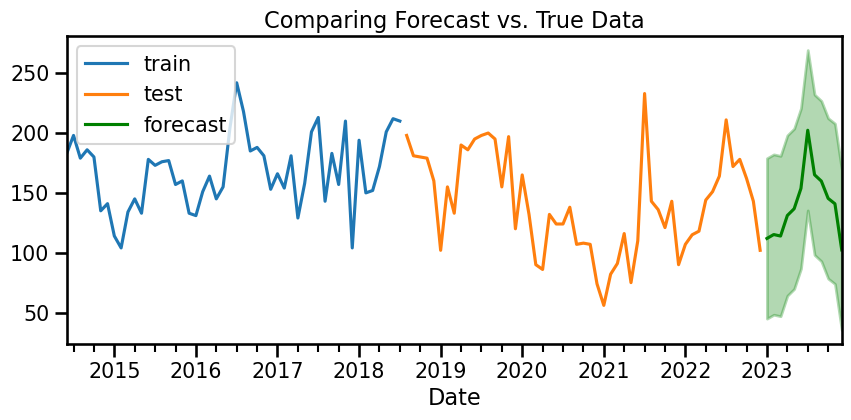

In [685]:
# Ger forecast into true future (fit on entrie time series)
forecast_df = final_model.get_forecast(steps=12).summary_frame()

plot_forecast(train, test, forecast_df, n_train_lags = 50);





#### Calculate Summary Metrics for Stakeholder

In [686]:
# Define starting and final values
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
# Change in x
delta = final_value - starting_value
print(f'The change in theft over the forecast is {delta: .2f}.')
perc_change = (delta/starting_value) *100
print (f'The percentage change is {perc_change :.2f}%.')



The change in theft over the forecast is -9.58.
The percentage change is -8.56%.


In [687]:
forecast_df

THEFT             mean    mean_se  mean_ci_lower  mean_ci_upper
2023-01-31  111.922605  34.181337      44.928416     178.916794
2023-02-28  115.184528  34.181337      48.190339     182.178718
2023-03-31  113.925297  34.181337      46.931108     180.919487
2023-04-30  131.100169  34.181337      64.105980     198.094358
2023-05-31  136.730452  34.181337      69.736263     203.724641
2023-06-30  153.725608  34.181337      86.731419     220.719798
2023-07-31  202.327655  34.181337     135.333466     269.321845
2023-08-31  165.115626  34.181337      98.121436     232.109815
2023-09-30  159.834544  34.181337      92.840354     226.828733
2023-10-31  145.398350  34.181337      78.404160     212.392539
2023-11-30  140.888804  34.181337      73.894614     207.882993
2023-12-31  102.339720  34.181337      35.345530     169.333909

In [688]:
ts.loc['2022']

Date
2022-01-31    107
2022-02-28    115
2022-03-31    118
2022-04-30    144
2022-05-31    151
2022-06-30    164
2022-07-31    211
2022-08-31    172
2022-09-30    178
2022-10-31    162
2022-11-30    143
2022-12-31    102
Freq: M, Name: THEFT, dtype: int64

* Final Recommendations
Based on the above analysis, we recommend using Model 2 (ARIMA(0, 0, 0)x(1, 1, 2, 12)) for forecasting the number of thefts in Chicago over the next six months. This model provides the optimal balance between complexity and prediction quality, making it the best choice according to the AIC criterion.

### Total Crime

In [689]:
crims_data['total crims']=  crims_data.sum(axis=1)
crims_data

BATTERY  GAMBLING  CRIMINAL DAMAGE  OFFENSE INVOLVING CHILDREN  \
Date                                                                         
2001-01-31      198       0.0              109                           7   
2001-02-28      214       0.0              119                           5   
2001-03-31      283       1.0              169                          11   
2001-04-30      321       2.0              154                           7   
2001-05-31      250       1.0              145                           5   
...             ...       ...              ...                         ...   
2022-08-31      109       NaN               85                           9   
2022-09-30      109       NaN               89                           8   
2022-10-31      129       NaN              114                           6   
2022-11-30       97       NaN               72                           2   
2022-12-31      122       NaN              128                           5   

            THEFT  ASSAULT  NARCOTICS  CRIM SEXUAL ASSAULT  \
Date                                                         
2001-01-31    246       94        147                  4.0   
2001-02-28    259       84        154                  7.0   
2001-03-31    207       84        179                  9.0   
2001-04-30    289      108        161                  7.0   
2001-05-31    288       69        135                  5.0   
...           ...      ...        ...                  ...   
2022-08-31    172       69         19                  NaN   
2022-09-30    178       63         11                  NaN   
2022-10-31    162       60         12                  NaN   
2022-11-30    143       53         26                  NaN   
2022-12-31    102       62          6                  NaN   

            DECEPTIVE PRACTICE  WEAPONS VIOLATION  OTHER OFFENSE  \
Date                                                               
2001-01-31                  44                  5             88   
2001-02-28                  48                  9             90   
2001-03-31                  34                  7             65   
2001-04-30                  47                 15             75   
2001-05-31                  39                 14             68   
...                        ...                ...            ...   
2022-08-31                  52                 25             43   
2022-09-30                  61                 29             27   
2022-10-31                  59                 17             41   
2022-11-30                  55                 18             43   
2022-12-31                  43                 58             37   

            MOTOR VEHICLE THEFT  SEX OFFENSE  BURGLARY  \
Date                                                     
2001-01-31                   64            8        70   
2001-02-28                   72            4        58   
2001-03-31                   91            6        46   
2001-04-30                   59            5        59   
2001-05-31                   79           13        72   
...                         ...          ...       ...   
2022-08-31                   70            5        28   
2022-09-30                  126            4        24   
2022-10-31                   91            6        27   
2022-11-30                   99            5        18   
2022-12-31                   88            3        21   

            PUBLIC PEACE VIOLATION  LIQUOR LAW VIOLATION  ROBBERY  \
Date                                                                
2001-01-31                       6                     3       34   
2001-02-28                       6                     3       29   
2001-03-31                       1                     7       52   
2001-04-30                       5                    10       51   
2001-05-31                       4                     5       39   
...                            ...                   ...      ...  

In [690]:
total_crime = crims_data['total crims']
total_crime

Date
2001-01-31    1190.0
2001-02-28    1227.0
2001-03-31    1305.0
2001-04-30    1433.0
2001-05-31    1297.0
               ...  
2022-08-31     737.0
2022-09-30     781.0
2022-10-31     783.0
2022-11-30     663.0
2022-12-31     726.0
Freq: M, Name: total crims, Length: 264, dtype: float64

In [691]:
# # Check for null values
total_crime.isna().sum()

0

In [692]:
total_crime.index

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', length=264, freq='M')

<Axes: xlabel='Date'>

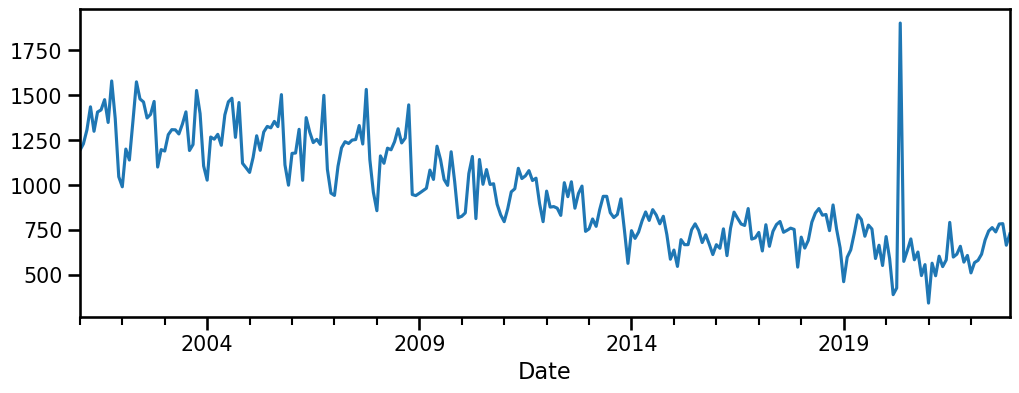

In [693]:
# plot  total crims 
total_crime.plot()


#### Determine if a seasonal or non-seasonal model is appropriate for the data

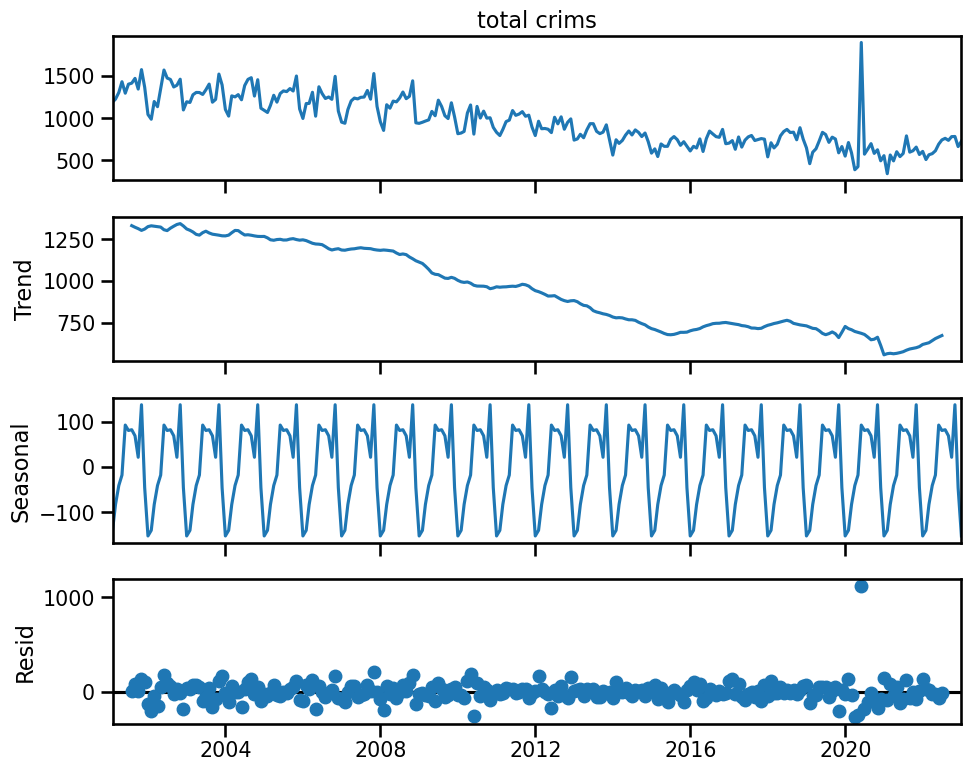

In [694]:
decomp_total_crimes  =  tsa.seasonal_decompose(total_crime)
fig = decomp_total_crimes.plot()
fig.set_size_inches(10, 8)
fig.tight_layout()

In [695]:
# How big is the seasonal component
seasonal_delta_total= decomp_total_crimes.seasonal.max() - decomp_total_crimes.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta_total} which is ~{seasonal_delta_total/(total_crime.max()-total_crime.min()) * 100 :.2f}% of the variation in time series.")



The seasonal component is 289.3730158730159 which is ~18.57% of the variation in time series.


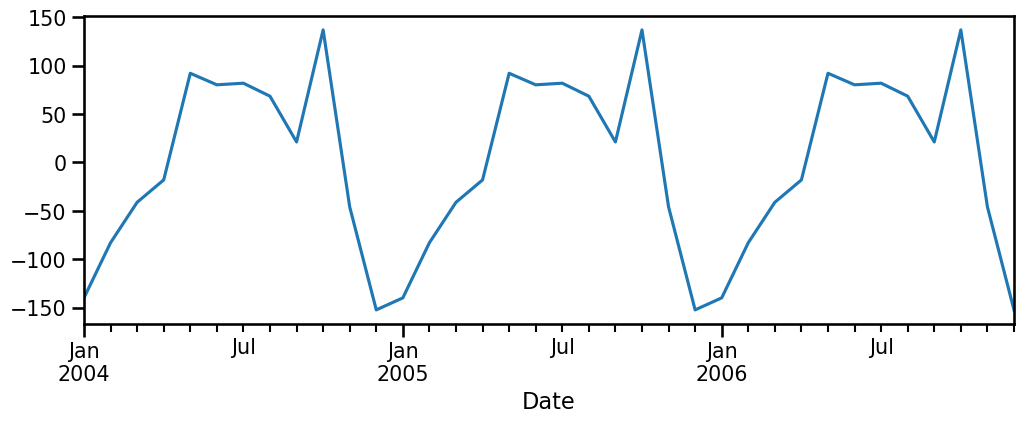

In [696]:
# zooming in on smaller time period to see length of season
decomp_total_crimes.seasonal.loc["2004":'2006'].plot(style= '-');


#### Check Stationarity and determine differencing (d and D)

In [697]:
# Check for stationarity
get_adfuller_results(total_crime)


Test Statistic  # of Lags Used  # of Observations   p-value  alpha  \
adfuller       -0.966777              15                248  0.765188   0.05   

          sig/stationary?  
adfuller            False

In [698]:
# Determine differencing
d = ndiffs(total_crime)
print(f'd is {d}')
D = nsdiffs(total_crime, m = 12)
print(f'D is {D}')



d is 1
D is 0


In [699]:
ts_diff = total_crime.diff().dropna()
get_adfuller_results(ts_diff)

Test Statistic  # of Lags Used  # of Observations   p-value  alpha  \
adfuller       -5.714758              14                248  0.000001   0.05   

          sig/stationary?  
adfuller             True

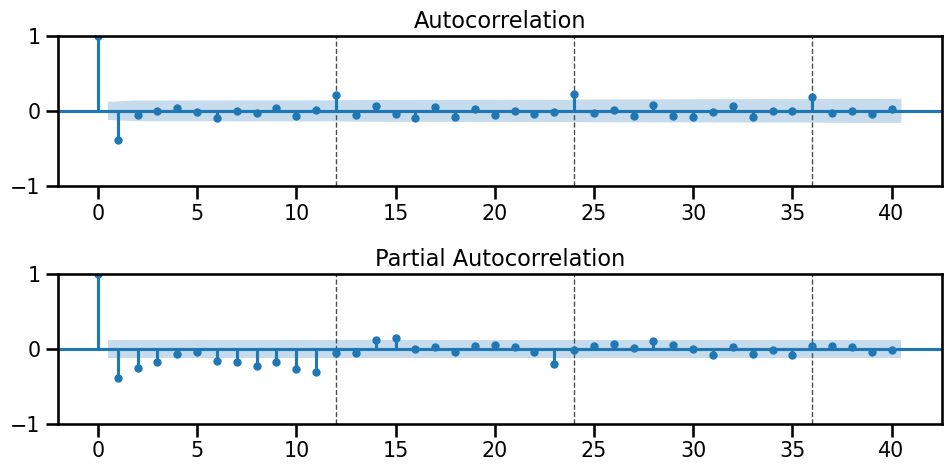

In [700]:
fig=plot_acf_pacf(ts_diff, m=12, annotate_seas=True)

#### Split into Training and Test Sets

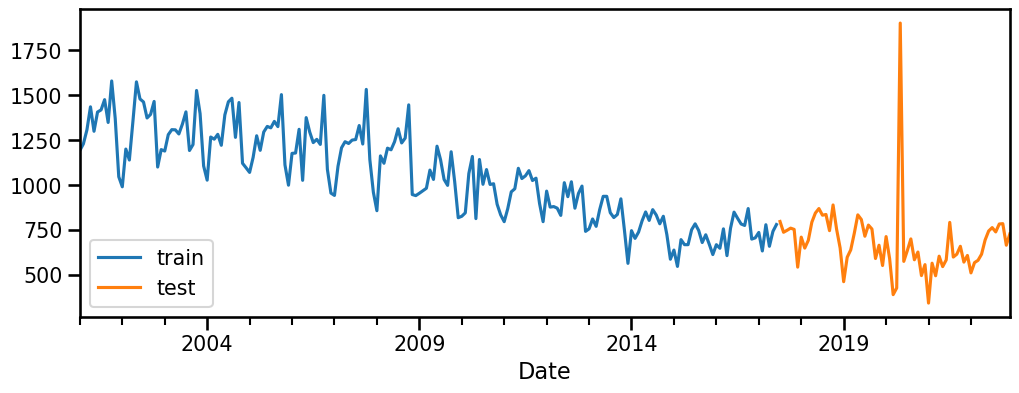

In [701]:
train2 , test2 =train_test_split(total_crime, test_size=0.25)
ax = train2.plot(label = 'train')
test2.plot(label= 'test', ax=ax)
ax.legend();

#### Define the Time Series Model Orders and Fit the model to the training data

In [702]:
# Orders for non seasonal components
p = 0 # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1 # nonseasonal MA

# Orders for seasonal components (if seasonal model)
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima2 = tsa.ARIMA(train2, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()




In [703]:
sarima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                      total crims   No. Observations:                  198
Model:             ARIMA(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -1212.170
Date:                          Wed, 12 Jun 2024   AIC                           2430.340
Time:                                  13:06:13   BIC                           2440.189
Sample:                              01-31-2001   HQIC                          2434.327
                                   - 06-30-2017                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8620      0.041    -21.126      0.000      -0.942      -0.782
ma.S.L12       0.4758      0.064      7.405      0.000       0.350       0.602
sigma2      1.266e+04   1205.443     10.504      0.000    1.03e+04     1.5e+04
===================================================================================
Ljung-Box (L1) (Q):                  13.23   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.00   Prob(JB):                         0.26
Heteroskedasticity (H):               0.38   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

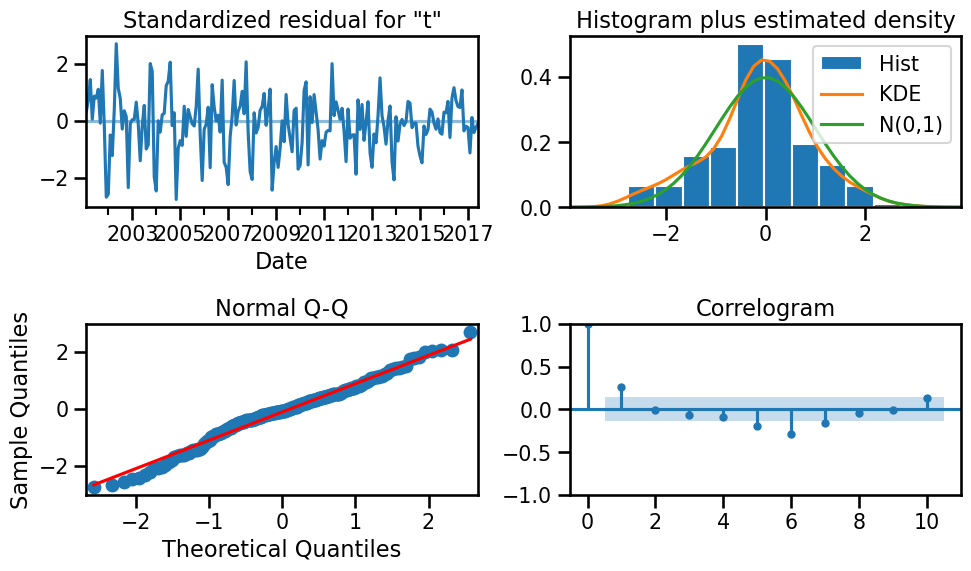

In [704]:
# Check the diagnostic plots.
fig = sarima2.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

#### Generate and Visualize Forecasts

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Comparing Forecast vs. True Data'}, xlabel='Date'>)

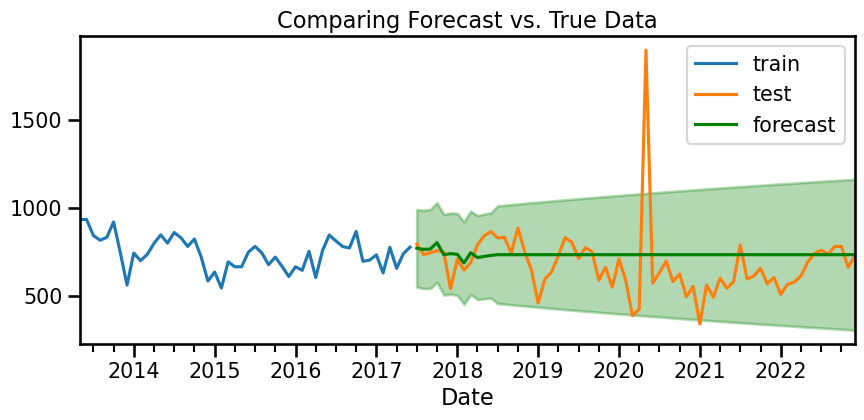

In [705]:
# Obtain summary of forecast as dataframe
forecast_df_total_crime = sarima2.get_forecast(len(test2)).summary_frame()
# Plot the forecast with true values
plot_forecast(train2, test2, forecast_df_total_crime, n_train_lags = 50)



In [706]:
regression_metrics_ts(test2 , forecast_df_total_crime['mean'])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 125.617
- MSE = 39,635.015
- RMSE = 199.085
- R^2 = -0.080
- MAPE = 20.35%


#### iter

In [707]:
import itertools
# Define the value or range of values for p, d, q
p_values = range(0, 3)  
d_values =range(0,2)          
q_values = range(0, 3)  
P_values = range (0, 3)
D_values =(0,1) 
Q_values = range (0,3)
m = [12]
# Create combinations of pdq to test
pdqPDQm_to_try = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, m))
# Display first 10 combinations
pdqPDQm_to_try[:40]


[(0, 0, 0, 0, 0, 0, 12),
 (0, 0, 0, 0, 0, 1, 12),
 (0, 0, 0, 0, 0, 2, 12),
 (0, 0, 0, 0, 1, 0, 12),
 (0, 0, 0, 0, 1, 1, 12),
 (0, 0, 0, 0, 1, 2, 12),
 (0, 0, 0, 1, 0, 0, 12),
 (0, 0, 0, 1, 0, 1, 12),
 (0, 0, 0, 1, 0, 2, 12),
 (0, 0, 0, 1, 1, 0, 12),
 (0, 0, 0, 1, 1, 1, 12),
 (0, 0, 0, 1, 1, 2, 12),
 (0, 0, 0, 2, 0, 0, 12),
 (0, 0, 0, 2, 0, 1, 12),
 (0, 0, 0, 2, 0, 2, 12),
 (0, 0, 0, 2, 1, 0, 12),
 (0, 0, 0, 2, 1, 1, 12),
 (0, 0, 0, 2, 1, 2, 12),
 (0, 0, 1, 0, 0, 0, 12),
 (0, 0, 1, 0, 0, 1, 12),
 (0, 0, 1, 0, 0, 2, 12),
 (0, 0, 1, 0, 1, 0, 12),
 (0, 0, 1, 0, 1, 1, 12),
 (0, 0, 1, 0, 1, 2, 12),
 (0, 0, 1, 1, 0, 0, 12),
 (0, 0, 1, 1, 0, 1, 12),
 (0, 0, 1, 1, 0, 2, 12),
 (0, 0, 1, 1, 1, 0, 12),
 (0, 0, 1, 1, 1, 1, 12),
 (0, 0, 1, 1, 1, 2, 12),
 (0, 0, 1, 2, 0, 0, 12),
 (0, 0, 1, 2, 0, 1, 12),
 (0, 0, 1, 2, 0, 2, 12),
 (0, 0, 1, 2, 1, 0, 12),
 (0, 0, 1, 2, 1, 1, 12),
 (0, 0, 1, 2, 1, 2, 12),
 (0, 0, 2, 0, 0, 0, 12),
 (0, 0, 2, 0, 0, 1, 12),
 (0, 0, 2, 0, 0, 2, 12),
 (0, 0, 2, 0, 1, 0, 12)]

In [708]:
# define starting aic as infinity
best_aic = float("inf")  
# define baseline for pdq
best_pdqPDQm = (0,0,0,0,0,0,0)
# Loop through each combination
for pdqPDQm in pdqPDQm_to_try:
    order = pdqPDQm[:3] # first three values are non seasonal (p,d,q)
    seasonal_order = pdqPDQm[3:] # Remaining values for seasonal (P,D,Q,m)
    
    model = tsa.ARIMA(train2, order=order, seasonal_order = seasonal_order)
    try:                         
        result = model.fit()
        print(pdqPDQm, result.aic)      
   
    except:
        print(f'{pdqPDQm}: caused an error')
    
    # If lower, replace best AIC with new value
    if result.aic < best_aic:
        
        best_aic = result.aic
        best_pdqPDQm = pdqPDQm
# Print the best orders and AIC score
print("Best AIC:", best_aic)
print("Best pdqPDQm:", best_pdqPDQm)


(0, 0, 0, 0, 0, 0, 12) 2755.932485673118
(0, 0, 0, 0, 0, 1, 12) 2617.9649408117525
(0, 0, 0, 0, 0, 2, 12) 2572.0726303895317
(0, 0, 0, 0, 1, 0, 12) 2301.0205216041772
(0, 0, 0, 0, 1, 1, 12) 2293.161891453183
(0, 0, 0, 0, 1, 2, 12) 2288.602070626328
(0, 0, 0, 1, 0, 0, 12) 2467.3748368148463
(0, 0, 0, 1, 0, 1, 12) 2463.4580596181686
(0, 0, 0, 1, 0, 2, 12) 2458.0483956041608
(0, 0, 0, 1, 1, 0, 12) 2291.201471122318
(0, 0, 0, 1, 1, 1, 12) 2293.1795786796692
(0, 0, 0, 1, 1, 2, 12) 2273.2456262006126
(0, 0, 0, 2, 0, 0, 12) 2461.7565642779427
(0, 0, 0, 2, 0, 1, 12) 2463.606228103847


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 0, 2, 0, 2, 12) 2414.9835359131916
(0, 0, 0, 2, 1, 0, 12) 2293.1346635596788
(0, 0, 0, 2, 1, 1, 12) 2280.2043998526524
(0, 0, 0, 2, 1, 2, 12) 2274.371688854606
(0, 0, 1, 0, 0, 0, 12) 2635.0867395964124
(0, 0, 1, 0, 0, 1, 12) 2540.376662691525
(0, 0, 1, 0, 0, 2, 12) 2515.9705653354395
(0, 0, 1, 0, 1, 0, 12) 2289.8107993994936
(0, 0, 1, 0, 1, 1, 12) 2273.7545819403813
(0, 0, 1, 0, 1, 2, 12) 2271.49832841476
(0, 0, 1, 1, 0, 0, 12) 2445.968567244399
(0, 0, 1, 1, 0, 1, 12) 2436.547599595375
(0, 0, 1, 1, 0, 2, 12) 2433.8752762440286
(0, 0, 1, 1, 1, 0, 12) 2272.332287084611
(0, 0, 1, 1, 1, 1, 12) 2273.8727827765265


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 1, 1, 1, 2, 12) 2261.7268281433066
(0, 0, 1, 2, 0, 0, 12) 2434.8831039473853
(0, 0, 1, 2, 0, 1, 12) 2449.960815175481


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 1, 2, 0, 2, 12) 2406.8620567264315
(0, 0, 1, 2, 1, 0, 12) 2273.2750346236485
(0, 0, 1, 2, 1, 1, 12) 2269.4259131204117


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 1, 2, 1, 2, 12) 2263.6575371414274
(0, 0, 2, 0, 0, 0, 12) 2577.0272834128928
(0, 0, 2, 0, 0, 1, 12) 2513.9814574281254
(0, 0, 2, 0, 0, 2, 12) 2488.1349539271023
(0, 0, 2, 0, 1, 0, 12) 2291.348660423071
(0, 0, 2, 0, 1, 1, 12) 2270.349695300114
(0, 0, 2, 0, 1, 2, 12) 2267.9282619576643
(0, 0, 2, 1, 0, 0, 12) 2443.608173239976
(0, 0, 2, 1, 0, 1, 12) 2429.392648356501
(0, 0, 2, 1, 0, 2, 12) 2426.538250805224
(0, 0, 2, 1, 1, 0, 12) 2269.293427282462
(0, 0, 2, 1, 1, 1, 12) 2269.941710376523
(0, 0, 2, 1, 1, 2, 12) 2260.4546837133685
(0, 0, 2, 2, 0, 0, 12) 2427.545158691695
(0, 0, 2, 2, 0, 1, 12) 2447.528057127674


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 2, 2, 0, 2, 12) 2405.3038409747674
(0, 0, 2, 2, 1, 0, 12) 2268.6714261717166
(0, 0, 2, 2, 1, 1, 12) 2268.748225919504
(0, 0, 2, 2, 1, 2, 12) 2262.312929098167
(0, 1, 0, 0, 0, 0, 12) 2505.0812537961565
(0, 1, 0, 0, 0, 1, 12) 2473.869615507532
(0, 1, 0, 0, 0, 2, 12) 2462.5289144192525
(0, 1, 0, 0, 1, 0, 12) 2357.335720036346
(0, 1, 0, 0, 1, 1, 12) 2286.9178429615495
(0, 1, 0, 0, 1, 2, 12) 2288.547858988012
(0, 1, 0, 1, 0, 0, 12) 2455.5297344508763
(0, 1, 0, 1, 0, 1, 12) 2430.3958037628245
(0, 1, 0, 1, 0, 2, 12) 2432.353253509141
(0, 1, 0, 1, 1, 0, 12) 2315.3071980875065
(0, 1, 0, 1, 1, 1, 12) 2288.500591856808
(0, 1, 0, 1, 1, 2, 12) 2290.251083951104
(0, 1, 0, 2, 0, 0, 12) 2441.2989223571467
(0, 1, 0, 2, 0, 1, 12) 2432.349565850898
(0, 1, 0, 2, 0, 2, 12) 2433.9322126225807
(0, 1, 0, 2, 1, 0, 12) 2299.119709743541
(0, 1, 0, 2, 1, 1, 12) 2290.047708921419
(0, 1, 0, 2, 1, 2, 12) 2292.2169865833566
(0, 1, 1, 0, 0, 0, 12) 2481.6870409314374
(0, 1, 1, 0, 0, 1, 12) 2430.3398368937605
(0,

C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 0, 2, 0, 2, 12) 2401.2355087847063
(1, 0, 0, 2, 1, 0, 12) 2261.661194639166
(1, 0, 0, 2, 1, 1, 12) 2262.1455124831054
(1, 0, 0, 2, 1, 2, 12) 2259.34659983249
(1, 0, 1, 0, 0, 0, 12) 2494.549226440285
(1, 0, 1, 0, 0, 1, 12) 2448.072918389611
(1, 0, 1, 0, 0, 2, 12) 2432.149140932318
(1, 0, 1, 0, 1, 0, 12) 2284.4893846130817
(1, 0, 1, 0, 1, 1, 12) 2208.7364774321422
(1, 0, 1, 0, 1, 2, 12) 2210.597203977255
(1, 0, 1, 1, 0, 0, 12) 2405.7757071142287


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 1, 1, 0, 1, 12) 2362.8152817966743


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 1, 1, 0, 2, 12) 2362.5868419274548
(1, 0, 1, 1, 1, 0, 12) 2238.399604764104
(1, 0, 1, 1, 1, 1, 12) 2210.60262797973
(1, 0, 1, 1, 1, 2, 12) 2212.8972160989288
(1, 0, 1, 2, 0, 0, 12) 2379.4918749179187
(1, 0, 1, 2, 0, 1, 12) 2362.6430874097778
(1, 0, 1, 2, 0, 2, 12) 2369.4124426172566
(1, 0, 1, 2, 1, 0, 12) 2217.7309079254014
(1, 0, 1, 2, 1, 1, 12) 2216.3307427632726


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 1, 2, 1, 2, 12) 2214.728347941522
(1, 0, 2, 0, 0, 0, 12) 2480.881776018109
(1, 0, 2, 0, 0, 1, 12) 2433.015351435679


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 2, 0, 0, 2, 12) 2419.9915987758814
(1, 0, 2, 0, 1, 0, 12) 2282.5502926495965


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 2, 0, 1, 1, 12) 2210.234371655394


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 2, 0, 1, 2, 12) 2212.1826295506507
(1, 0, 2, 1, 0, 0, 12) 2399.3663774365405
(1, 0, 2, 1, 0, 1, 12) 2363.206637708904


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 2, 1, 0, 2, 12) 2363.229338817991
(1, 0, 2, 1, 1, 0, 12) 2239.522247075286


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autore

(1, 0, 2, 1, 1, 1, 12) 2213.3876472680254
(1, 0, 2, 1, 1, 2, 12) 2217.376383273775
(1, 0, 2, 2, 0, 0, 12) 2378.0215142195293
(1, 0, 2, 2, 0, 1, 12) 2363.2288320997286


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 2, 2, 0, 2, 12) 2369.116274602984
(1, 0, 2, 2, 1, 0, 12) 2219.565151710804


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 2, 2, 1, 1, 12) 2217.273509930882


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0, 2, 2, 1, 2, 12) 2221.648299867259
(1, 1, 0, 0, 0, 0, 12) 2490.4821160946635
(1, 1, 0, 0, 0, 1, 12) 2456.4643949985502
(1, 1, 0, 0, 0, 2, 12) 2442.1139907742436
(1, 1, 0, 0, 1, 0, 12) 2331.3218987177424
(1, 1, 0, 0, 1, 1, 12) 2248.9080764655246
(1, 1, 0, 0, 1, 2, 12) 2250.7524691098415
(1, 1, 0, 1, 0, 0, 12) 2433.3181905056954
(1, 1, 0, 1, 0, 1, 12) 2394.38509700311
(1, 1, 0, 1, 0, 2, 12) 2396.023308571541
(1, 1, 0, 1, 1, 0, 12) 2281.553757306826
(1, 1, 0, 1, 1, 1, 12) 2250.7468496062043
(1, 1, 0, 1, 1, 2, 12) 2252.90392580758
(1, 1, 0, 2, 0, 0, 12) 2411.6861483762664
(1, 1, 0, 2, 0, 1, 12) 2396.02479866309
(1, 1, 0, 2, 0, 2, 12) 2398.023004262542
(1, 1, 0, 2, 1, 0, 12) 2260.137094381239
(1, 1, 0, 2, 1, 1, 12) 2252.7320402429846


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 0, 2, 1, 2, 12) 2254.495248733856
(1, 1, 1, 0, 0, 0, 12) 2458.621377857273
(1, 1, 1, 0, 0, 1, 12) 2414.7345715138626
(1, 1, 1, 0, 0, 2, 12) 2401.3703363306317
(1, 1, 1, 0, 1, 0, 12) 2270.5272212372242
(1, 1, 1, 0, 1, 1, 12) 2197.321493551342
(1, 1, 1, 0, 1, 2, 12) 2199.3105561592547
(1, 1, 1, 1, 0, 0, 12) 2382.195737626723
(1, 1, 1, 1, 0, 1, 12) 2342.5388054127316
(1, 1, 1, 1, 0, 2, 12) 2350.2600844402614
(1, 1, 1, 1, 1, 0, 12) 2228.1851331392672
(1, 1, 1, 1, 1, 1, 12) 2199.3108028506413
(1, 1, 1, 1, 1, 2, 12) 2200.8804781401627
(1, 1, 1, 2, 0, 0, 12) 2360.9457465168734
(1, 1, 1, 2, 0, 1, 12) 2344.4852172354063
(1, 1, 1, 2, 0, 2, 12) 2346.113957727732
(1, 1, 1, 2, 1, 0, 12) 2207.698825847021
(1, 1, 1, 2, 1, 1, 12) 2201.294293823349
(1, 1, 1, 2, 1, 2, 12) 2202.7225706608688
(1, 1, 2, 0, 0, 0, 12) 2460.612193706301
(1, 1, 2, 0, 0, 1, 12) 2416.4352610346996
(1, 1, 2, 0, 0, 2, 12) 2403.282480114647
(1, 1, 2, 0, 1, 0, 12) 2272.0699281396865
(1, 1, 2, 0, 1, 1, 12) 2199.1802152160917
(

C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 2, 1, 0, 0, 12) 2392.0420520888592


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 2, 1, 0, 1, 12) 2344.7061482107374


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 2, 1, 0, 2, 12) 14.0
(1, 1, 2, 1, 1, 0, 12) 2229.8270722951584
(1, 1, 2, 1, 1, 1, 12) 2201.173883795336
(1, 1, 2, 1, 1, 2, 12) 2202.6982478254286


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 2, 2, 0, 0, 12) 2365.328642420674
(1, 1, 2, 2, 0, 1, 12) 2381.927912427651
(1, 1, 2, 2, 0, 2, 12) 2373.3314078214808


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 2, 2, 1, 0, 12) 2208.99940033283
(1, 1, 2, 2, 1, 1, 12) 2203.159098139744


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 2, 2, 1, 2, 12) 2204.6050003673854
(2, 0, 0, 0, 0, 0, 12) 2498.939688717215
(2, 0, 0, 0, 0, 1, 12) 2461.3655855551965
(2, 0, 0, 0, 0, 2, 12) 2445.585152162581
(2, 0, 0, 0, 1, 0, 12) 2290.8412992226295
(2, 0, 0, 0, 1, 1, 12) 2253.7763848557365
(2, 0, 0, 0, 1, 2, 12) 2254.3452207034925
(2, 0, 0, 1, 0, 0, 12) 2430.2895837992746
(2, 0, 0, 1, 0, 1, 12) 2400.2752414490014
(2, 0, 0, 1, 0, 2, 12) 2400.7729864120206
(2, 0, 0, 1, 1, 0, 12) 2261.828858186679
(2, 0, 0, 1, 1, 1, 12) 2254.5546840892653


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 0, 1, 1, 2, 12) 2254.2636067958424
(2, 0, 0, 2, 0, 0, 12) 2407.75122530631
(2, 0, 0, 2, 0, 1, 12) 2400.994532456907


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 0, 2, 0, 2, 12) 2396.0109150552785
(2, 0, 0, 2, 1, 0, 12) 2252.515242911431
(2, 0, 0, 2, 1, 1, 12) 2254.3121295528317
(2, 0, 0, 2, 1, 2, 12) 2256.302825695745
(2, 0, 1, 0, 0, 0, 12) 2476.2795464087576
(2, 0, 1, 0, 0, 1, 12) 2432.5360961874158
(2, 0, 1, 0, 0, 2, 12) 2419.017658560756


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 0, 1, 0, 12) 2283.203915014763


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 0, 1, 1, 12) 2210.2903454030893


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 0, 1, 2, 12) 2212.2303323374626
(2, 0, 1, 1, 0, 0, 12) 2399.950322814626
(2, 0, 1, 1, 0, 1, 12) 2361.568383670989


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 1, 0, 2, 12) 2363.2920751728243
(2, 0, 1, 1, 1, 0, 12) 2239.6686306037836


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autore

(2, 0, 1, 1, 1, 1, 12) 2212.2321189553168
(2, 0, 1, 1, 1, 2, 12) 2214.416132046087


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 1, 2, 0, 0, 12) 2378.2208269227594


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 1, 2, 0, 1, 12) 2363.316938216313
(2, 0, 1, 2, 0, 2, 12) 2368.416876579743


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 2, 1, 0, 12) 2219.5884988802754


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 2, 1, 1, 12) 2217.4219254861064


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 1, 2, 1, 2, 12) 2216.504864925534
(2, 0, 2, 0, 0, 0, 12) 2478.2712966040963
(2, 0, 2, 0, 0, 1, 12) 2434.2371896733207


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 2, 0, 0, 2, 12) 2420.9355381137243
(2, 0, 2, 0, 1, 0, 12) 2281.9934982727946


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autore

(2, 0, 2, 0, 1, 1, 12) 2212.1508005971623


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 0, 1, 2, 12) 2214.5867562809976


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 1, 0, 0, 12) 2401.3706958466832
(2, 0, 2, 1, 0, 1, 12) 2363.4347146995096


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 1, 0, 2, 12) 2365.2197761781736


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autore

(2, 0, 2, 1, 1, 0, 12) 2240.5743859723098


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 2, 1, 1, 1, 12) 2219.624044106749


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 1, 1, 2, 12) 2216.131260683323


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 2, 0, 0, 12) 2380.819060369429
(2, 0, 2, 2, 0, 1, 12) 2365.206216336715


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 2, 0, 2, 12) 2368.097041014602


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autore

(2, 0, 2, 2, 1, 0, 12) 2220.8846088373766
(2, 0, 2, 2, 1, 1, 12) 2216.0535845785726


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 2, 1, 2, 12) 2218.3153826515054
(2, 1, 0, 0, 0, 0, 12) 2486.9220451812125
(2, 1, 0, 0, 0, 1, 12) 2446.685840699709
(2, 1, 0, 0, 0, 2, 12) 2434.2016215183603
(2, 1, 0, 0, 1, 0, 12) 2310.133672084622
(2, 1, 0, 0, 1, 1, 12) 2234.0064618261713
(2, 1, 0, 0, 1, 2, 12) 2235.93113568502
(2, 1, 0, 1, 0, 0, 12) 2418.573908814881
(2, 1, 0, 1, 0, 1, 12) 2380.099213490601


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 0, 1, 0, 2, 12) 2381.8670717241494
(2, 1, 0, 1, 1, 0, 12) 2264.4678466314763
(2, 1, 0, 1, 1, 1, 12) 2235.9314897992494


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 0, 1, 1, 2, 12) 2237.617413968972
(2, 1, 0, 2, 0, 0, 12) 2397.571220835186
(2, 1, 0, 2, 0, 1, 12) 2381.880034160841
(2, 1, 0, 2, 0, 2, 12) 2383.7321686562273
(2, 1, 0, 2, 1, 0, 12) 2242.4497752780235
(2, 1, 0, 2, 1, 1, 12) 2237.9254571292477
(2, 1, 0, 2, 1, 2, 12) 2239.30487588495
(2, 1, 1, 0, 0, 0, 12) 2460.6086086119167
(2, 1, 1, 0, 0, 1, 12) 2416.390634391472
(2, 1, 1, 0, 0, 2, 12) 2403.254964035227
(2, 1, 1, 0, 1, 0, 12) 2271.905969741897
(2, 1, 1, 0, 1, 1, 12) 2198.8191557766877
(2, 1, 1, 0, 1, 2, 12) 2200.8149797765554
(2, 1, 1, 1, 0, 0, 12) 2383.5537339410066
(2, 1, 1, 1, 0, 1, 12) 2344.36741814178


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 1, 1, 0, 2, 12) 2347.167480344926
(2, 1, 1, 1, 1, 0, 12) 2229.1650515566716
(2, 1, 1, 1, 1, 1, 12) 2200.815067457939


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 1, 1, 1, 2, 12) 2202.2945091000147
(2, 1, 1, 2, 0, 0, 12) 2362.753453221256


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 1, 2, 0, 1, 12) 2346.367092760188


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 1, 2, 0, 2, 12) 2348.335498935746
(2, 1, 1, 2, 1, 0, 12) 2209.033395790522
(2, 1, 1, 2, 1, 1, 12) 2202.802335770515
(2, 1, 1, 2, 1, 2, 12) 2204.162077150589


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 2, 0, 0, 0, 12) 2458.919681866192


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 2, 0, 0, 1, 12) 2410.2901087209975


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2, 0, 0, 2, 12) 2404.688989105255
(2, 1, 2, 0, 1, 0, 12) 2270.1873959387653
(2, 1, 2, 0, 1, 1, 12) 2199.5202732395696
(2, 1, 2, 0, 1, 2, 12) 2201.467480609649


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 2, 1, 0, 0, 12) 2385.3912470062787


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 2, 1, 0, 1, 12) 2354.238781303234


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 2, 1, 0, 2, 12) 2353.808370707512


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2, 1, 1, 0, 12) 2230.614957081407
(2, 1, 2, 1, 1, 1, 12) 2201.469459213598
(2, 1, 2, 1, 1, 2, 12) 2203.0543414100066


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 2, 2, 0, 0, 12) 2364.348514646931


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 2, 2, 0, 1, 12) 2352.7961646886124


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 2, 2, 0, 2, 12) 2358.215195179504
(2, 1, 2, 2, 1, 0, 12) 2209.083702798999
(2, 1, 2, 2, 1, 1, 12) 2203.4195339110147
(2, 1, 2, 2, 1, 2, 12) 2204.892113674665
Best AIC: 14.0
Best pdqPDQm: (1, 1, 2, 1, 0, 2, 12)


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Best AIC: 14.0
Best pdqPDQm: (1, 1, 2, 1, 0, 2, 12)

#### Fit Statsmodels SARIMA Model Using the Parameters from auto_arima

In [709]:
import pmdarima as pm
# Default auto_arima will select model based on AIC score
auto_model_total = pm.auto_arima(
    train2,
    seasonal=True,  # True or False
    m=12,  # if seasonal
    trace=True
)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2507.037, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2435.255, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2425.747, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2505.081, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2483.438, Time=0.12 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2343.785, Time=0.68 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2387.747, Time=0.43 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2345.820, Time=1.53 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2412.807, Time=0.92 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2364.418, Time=0.97 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2432.376, Time=0.36 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept

In [710]:
# Try auto_arima orders
sarima_total_crime = tsa.ARIMA(train2, order = auto_model_total.order, seasonal_order=auto_model_total.seasonal_order).fit()

# Obtain summary
sarima_total_crime.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                      total crims   No. Observations:                  198
Model:             ARIMA(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1167.126
Date:                          Wed, 12 Jun 2024   AIC                           2342.252
Time:                                  13:13:54   BIC                           2355.385
Sample:                              01-31-2001   HQIC                          2347.568
                                   - 06-30-2017                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8630      0.038    -22.467      0.000      -0.938      -0.788
ar.S.L12       0.9787      0.012     81.466      0.000       0.955       1.002
ma.S.L12      -0.7522      0.068    -11.129      0.000      -0.885      -0.620
sigma2      7506.0800    725.034     10.353      0.000    6085.040    8927.120
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.27   Prob(JB):                         0.30
Heteroskedasticity (H):               0.47   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Comparing Forecast vs. True Data'}, xlabel='Date'>)

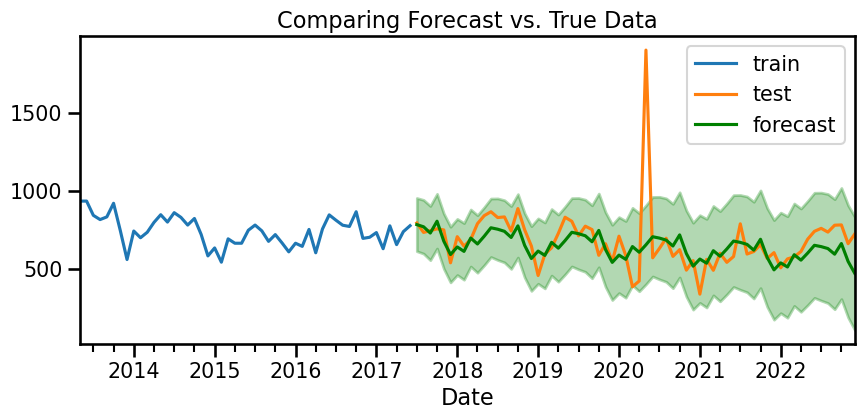

In [711]:
# Obtain summary of forecast as dataframe
forecast_df_total_crime_auto = sarima_total_crime.get_forecast(len(test2)).summary_frame()
# Plot the forecast with true values
plot_forecast(train2, test2, forecast_df_total_crime_auto, n_train_lags = 50)

In [712]:
regression_metrics_ts(test2 , forecast_df_total_crime_auto['mean'])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 99.255
- MSE = 33,346.049
- RMSE = 182.609
- R^2 = 0.091
- MAPE = 14.11%


#### Comparison between the Models and Determining the Best
 * Model 1: ARIMA(1, 1, 1)x(1, 0, 1, 12)
     * AIC: 2,615.822
     * BIC: 2,632.238


* Model 2: ARIMA(0, 1, 2)x(1, 0, [1], 12)
     * AIC: 2,615.748
     * BIC: 2,632.164

#### Summary:
* Model 2, ARIMA(0, 1, 2)x(1, 0, 1, 12), is slightly better as it has lower AIC and BIC values compared to Model 1, indicating a better fit for the data. However, both models contain non-significant statistical coefficients, suggesting that further potential improvements should be considered.

#### Model 1 Metrics:
 * R² (R-squared): 0.079
 * MAPE (Mean Absolute Percentage Error): 14.1%
 * MAE (Mean Absolute Error): 200.842
 * MSE (Mean Squared Error): 135,130.707
 * RMSE (Root Mean Squared Error): 367.601
#### Model 2 Metrics:
  * R² (R-squared): 0.079
  * MAPE (Mean Absolute Percentage Error): 14.18%
  * MAE (Mean Absolute Error): 200.842
  * MSE (Mean Squared Error): 135,130.707
  * RMSE (Root Mean Squared Error): 367.601
#### Comparison and Analysis:
* For the models studied, the results are similar across all metrics. Both models show weak forecasting performance as indicated by the R² and MAPE values. However, Model 2 demonstrates a slight improvement in prediction accuracy with a MAPE of 14.18%, compared to 14.1% for Model 1.

#### Fit a final model on the entire time series

In [713]:
final_model = tsa.ARIMA(
    total_crime,
    order=(0,1,2),
    seasonal_order=(1,0,1,12),
).fit()



C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


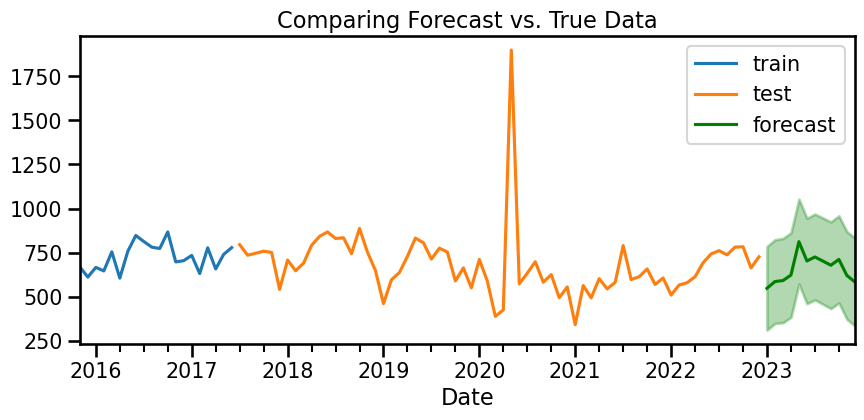

In [714]:
# Ger forecast into true future (fit on entrie time series)
forecast_df_final = final_model.get_forecast(steps=12).summary_frame()

plot_forecast(train2, test2, forecast_df_final , n_train_lags = 20);



In [715]:
# Define starting and final values
starting_value = forecast_df_final['mean'].iloc[0]
final_value = forecast_df_final['mean'].iloc[-1]
# Change in x
delta = final_value - starting_value
print(f'The change in X over the forecast is {delta: .2f}.')
perc_change = (delta/starting_value) *100
print (f'The percentage change is {perc_change :.2f}%.')

The change in X over the forecast is  36.22.
The percentage change is 6.62%.


In [716]:
forecast_df_final.loc['2023']

total crims        mean     mean_se  mean_ci_lower  mean_ci_upper
2023-01-31   547.426127  121.012772     310.245453     784.606802
2023-02-28   585.582023  121.180883     348.071857     823.092189
2023-03-31   591.285275  121.806933     352.548073     830.022477
2023-04-30   622.323665  122.429782     382.365702     862.281628
2023-05-31   811.900528  123.049478     570.727983    1053.073073
2023-06-30   702.465296  123.666069     460.084255     944.846338
2023-07-31   725.006462  124.279601     481.422921     968.590003
2023-08-31   701.798298  124.890119     457.018163     946.578432
2023-09-30   678.082347  125.497666     432.111441     924.053253
2023-10-31   711.286597  126.102287     464.130656     958.442538
2023-11-30   620.224925  126.704022     371.889605     868.560246
2023-12-31   583.649139  127.302895     334.140051     833.158228

In [717]:
total_crime.loc['2022', ]

Date
2022-01-31    509.0
2022-02-28    566.0
2022-03-31    579.0
2022-04-30    613.0
2022-05-31    692.0
2022-06-30    742.0
2022-07-31    761.0
2022-08-31    737.0
2022-09-30    781.0
2022-10-31    783.0
2022-11-30    663.0
2022-12-31    726.0
Freq: M, Name: total crims, dtype: float64

### Narcotics 

In [718]:
ts_2 = crims_data['NARCOTICS']
print(f'the n null value =  {ts.isna().sum()}')

the n null value =  0


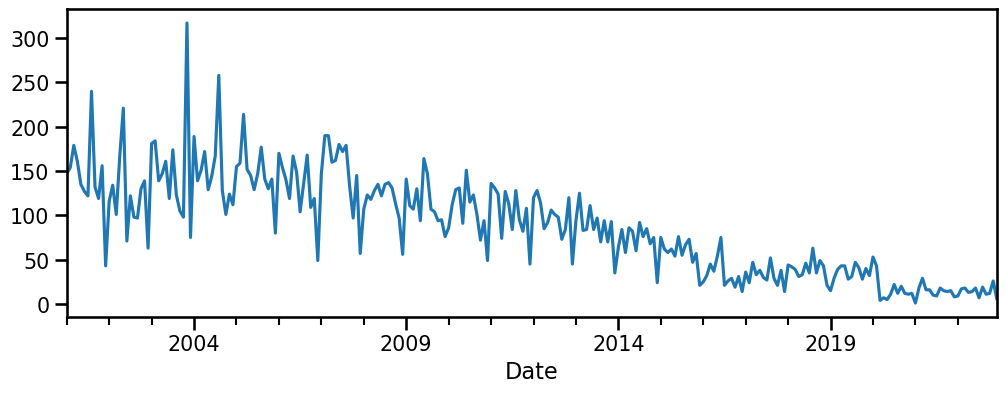

In [719]:
# Visualize selected time series
ax = ts_2.plot()

#### Determine if a seasonal or non-seasonal model is appropriate for the data

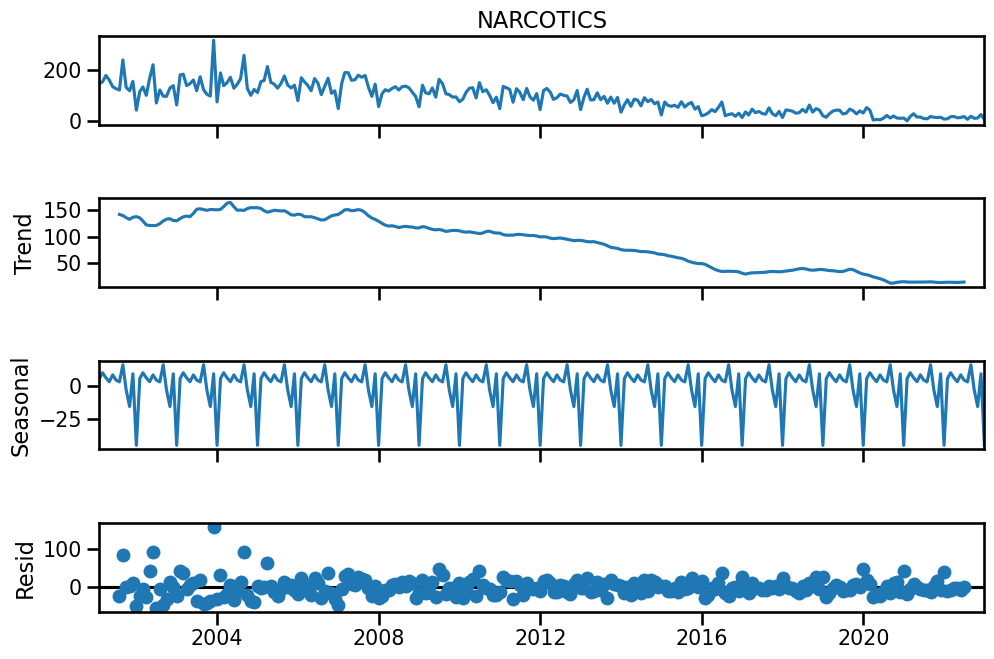

In [720]:
decomp= tsa.seasonal_decompose(ts_2)
fig  = decomp.plot()
fig.set_size_inches(10,8) 

In [721]:
decomp.seasonal.max()
decomp.seasonal.min()
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(ts.max()-ts.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 59.90079365079366 which is ~20.73% of the variation in time series.


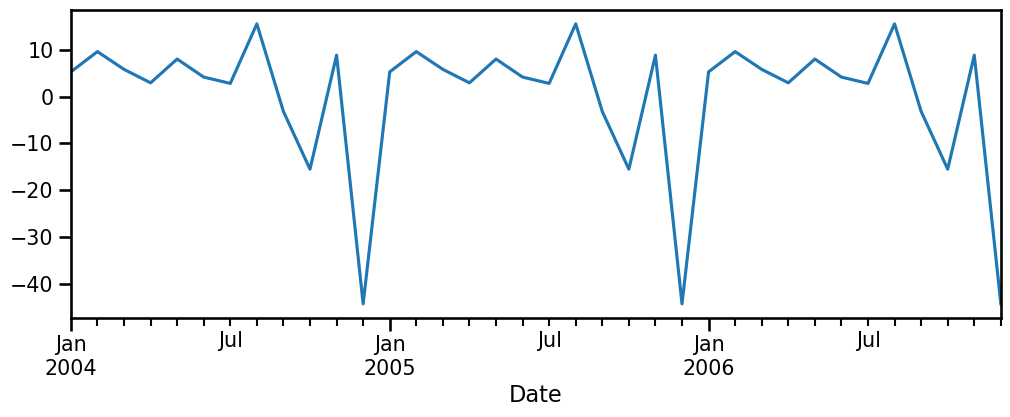

In [722]:
# zooming in on smaller time period to see length of season =  12 
decomp.seasonal.loc["2004":'2006'].plot(style = '-');

#### Check Stationarity and determine differencing (d and D)

In [723]:
get_adfuller_results(ts_2)

Test Statistic  # of Lags Used  # of Observations   p-value  alpha  \
adfuller       -0.004413              11                252  0.958166   0.05   

          sig/stationary?  
adfuller            False

In [724]:
# Determine differencing
d = ndiffs(ts_2)
print(f'd is {d}')
D = nsdiffs(ts_2, m = 12)
print(f'D is {D}')


d is 1
D is 0


In [725]:
# non seasonal differencing
ts2_diff = ts_2.diff().dropna()


In [726]:
get_adfuller_results(ts2_diff )

Test Statistic  # of Lags Used  # of Observations  p-value  alpha  \
adfuller       -10.79896              10                252      0.0   0.05   

          sig/stationary?  
adfuller             True

#### Check Autocorrelation and Partial Autocorrelation to determine initial orders

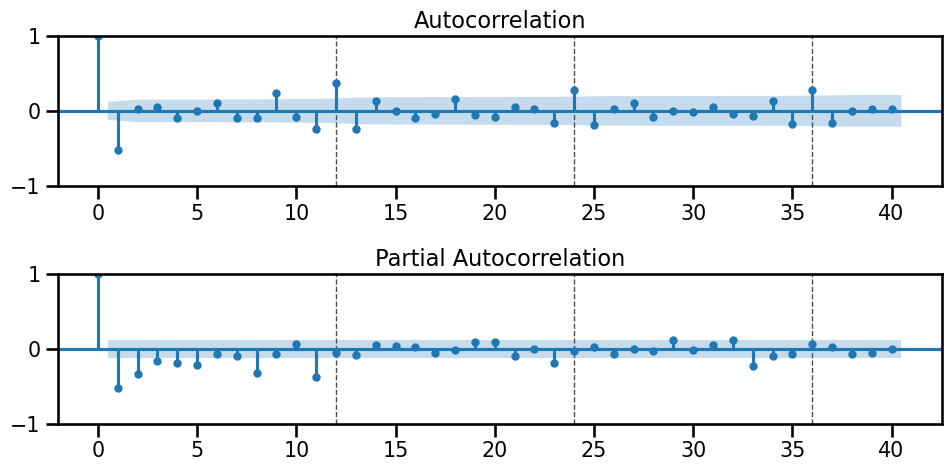

In [727]:
fig = plot_acf_pacf(ts2_diff, m =12 , annotate_seas=True)

try pdq = (1, 1 ,0 ) , PDQ = (1,0,0,12) 

#### Split into Training and Test Sets

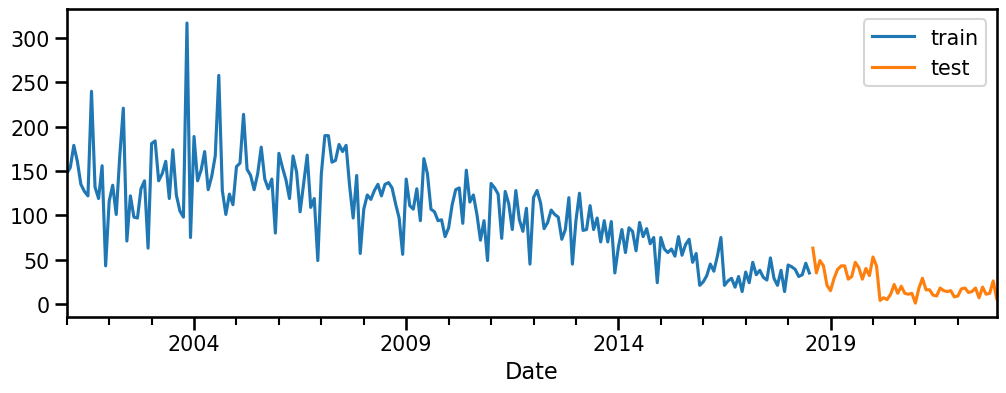

In [728]:
train , test  = train_test_split(ts_2 , test_size=0.2)

ax = train.plot(label="train")
test.plot(label="test")
ax.legend();



In [729]:
# Orders for non seasonal components
p =0 # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1 # nonseasonal MA

# Orders for seasonal components (if seasonal model)
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q =1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()





In [730]:
# Obtain summary
sarima.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                        NARCOTICS   No. Observations:                  211
Model:             ARIMA(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -1024.361
Date:                          Wed, 12 Jun 2024   AIC                           2054.723
Time:                                  13:14:00   BIC                           2064.764
Sample:                              01-31-2001   HQIC                          2058.782
                                   - 07-31-2018                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8974      0.036    -25.075      0.000      -0.968      -0.827
ma.S.L12       0.2839      0.053      5.393      0.000       0.181       0.387
sigma2       998.3470     50.675     19.701      0.000     899.026    1097.668
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               436.42
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             1.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

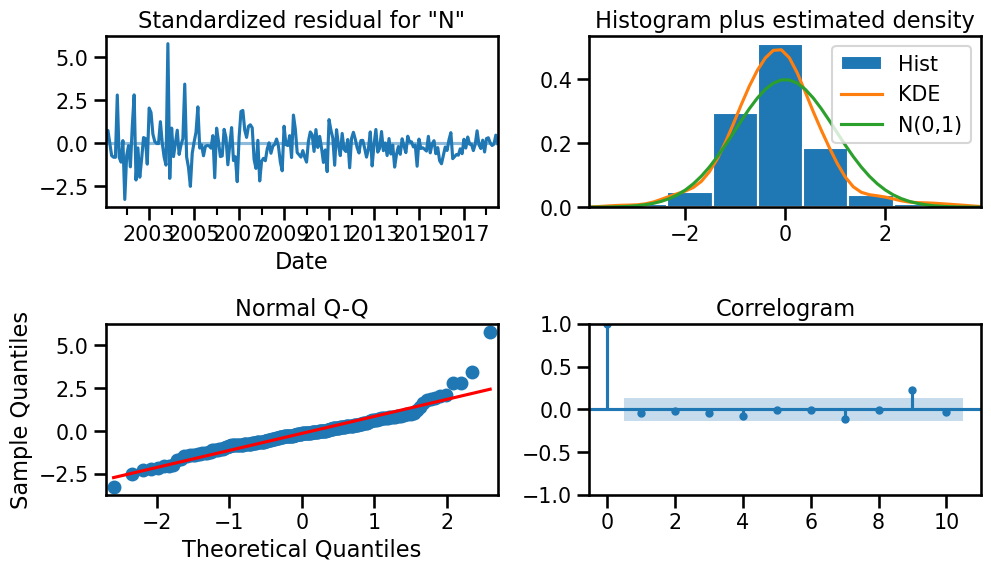

In [731]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()



#### Generate and Visualize Forecasts

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Comparing Forecast vs. True Data'}, xlabel='Date'>)

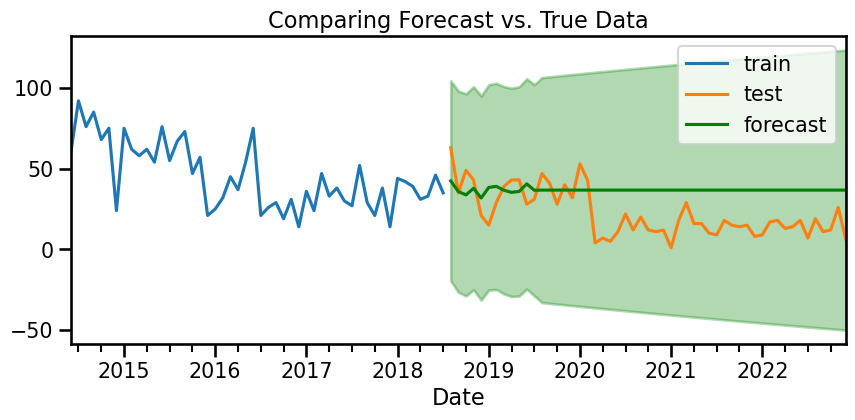

In [732]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(steps= len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df, n_train_lags = 50)



In [733]:
regression_metrics_ts(test, forecast_df["mean"])


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 18.282
- MSE = 415.946
- RMSE = 20.395
- R^2 = -1.004
- MAPE = 219.09%


#### ITER

In [734]:
import itertools
# Define the value or range of values for p, d, q
p_values = range(0, 3)  
d_values =range (0,2)          
q_values = range(0, 3)  
P_values = range (0, 3)
D_values = [1]
Q_values = range (0,3)
m = [12]
# Create combinations of pdq to test
pdqPDQm_to_try = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, m))
# Display first 10 combinations
pdqPDQm_to_try[:10]



[(0, 0, 0, 0, 1, 0, 12),
 (0, 0, 0, 0, 1, 1, 12),
 (0, 0, 0, 0, 1, 2, 12),
 (0, 0, 0, 1, 1, 0, 12),
 (0, 0, 0, 1, 1, 1, 12),
 (0, 0, 0, 1, 1, 2, 12),
 (0, 0, 0, 2, 1, 0, 12),
 (0, 0, 0, 2, 1, 1, 12),
 (0, 0, 0, 2, 1, 2, 12),
 (0, 0, 1, 0, 1, 0, 12)]

In [735]:
# Define starting AIC and MAPE as infinity
best_aic = float("inf")
best_mape = float("inf")

# Define baseline for pdqPDQm
best_pdqPDQm = (0, 0, 0, 0, 0, 0, 0)
# Loop through each combination
for pdqPDQm in pdqPDQm_to_try:
    order = pdqPDQm[:3]  # first three values are non-seasonal (p,d,q)
    seasonal_order = pdqPDQm[3:]  # Remaining values for seasonal (P,D,Q,m)
    
    model = tsa.ARIMA(train, order=order, seasonal_order=seasonal_order)
    try:                         
        result = model.fit()
        print(pdqPDQm, result.aic)      
   
        # If lower AIC is found, replace best AIC with new value
        if result.aic < best_aic:
            forecast_df = result.get_forecast(len(test)).predicted_mean
            mape = mean_absolute_percentage_error(test, forecast_df)
            if mape < best_mape:
                best_aic = result.aic
                best_pdqPDQm = pdqPDQm
                best_mape = mape
                best_model = result
                
    except Exception as e:
        print(f'{pdqPDQm}: caused an error - {str(e)}')

# Print the best orders and AIC score
print("Best AIC:", best_aic)
print("Best pdqPDQm:", best_pdqPDQm)
print("Best MAPE:", best_mape * 100)




(0, 0, 0, 0, 1, 0, 12) 2006.866961674365
(0, 0, 0, 0, 1, 1, 12) 1974.670734783244
(0, 0, 0, 0, 1, 2, 12) 1976.0682892482628
(0, 0, 0, 1, 1, 0, 12) 1980.9529393983796
(0, 0, 0, 1, 1, 1, 12) 1976.3407460363856
(0, 0, 0, 1, 1, 2, 12) 1966.6409800136603
(0, 0, 0, 2, 1, 0, 12) 1973.6440154602637
(0, 0, 0, 2, 1, 1, 12) 1975.631302692534
(0, 0, 0, 2, 1, 2, 12) 1962.5431458308694
(0, 0, 1, 0, 1, 0, 12) 2006.9006219147277
(0, 0, 1, 0, 1, 1, 12) 1968.7246643728868
(0, 0, 1, 0, 1, 2, 12) 1970.4222816386123
(0, 0, 1, 1, 1, 0, 12) 1979.326807028695
(0, 0, 1, 1, 1, 1, 12) 1970.5600175080413
(0, 0, 1, 1, 1, 2, 12) 1961.973291430048
(0, 0, 1, 2, 1, 0, 12) 1966.9351660213322
(0, 0, 1, 2, 1, 1, 12) 1968.5513730648017


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 1, 2, 1, 2, 12) 1958.849847855467
(0, 0, 2, 0, 1, 0, 12) 2008.3750914143893
(0, 0, 2, 0, 1, 1, 12) 1964.9121947990498
(0, 0, 2, 0, 1, 2, 12) 1966.7331303844
(0, 0, 2, 1, 1, 0, 12) 1979.0332721408959
(0, 0, 2, 1, 1, 1, 12) 1966.806985684371
(0, 0, 2, 1, 1, 2, 12) 1960.1910522085877
(0, 0, 2, 2, 1, 0, 12) 1964.8358531966705
(0, 0, 2, 2, 1, 1, 12) 1965.2652734067724
(0, 0, 2, 2, 1, 2, 12) 1957.8970139287978
(0, 1, 0, 0, 1, 0, 12) 2113.1075639999426
(0, 1, 0, 0, 1, 1, 12) 2025.213905815658
(0, 1, 0, 0, 1, 2, 12) 2027.2138094884378
(0, 1, 0, 1, 1, 0, 12) 2076.9845838246792
(0, 1, 0, 1, 1, 1, 12) 2027.2138457640106
(0, 1, 0, 1, 1, 2, 12) 2032.7263386347045
(0, 1, 0, 2, 1, 0, 12) 2041.0882643023297
(0, 1, 0, 2, 1, 1, 12) 2023.8620755031525
(0, 1, 0, 2, 1, 2, 12) 2024.8870802452643
(0, 1, 1, 0, 1, 0, 12) 1998.7624178888796
(0, 1, 1, 0, 1, 1, 12) 1913.4498674698616
(0, 1, 1, 0, 1, 2, 12) 1915.4496696467054
(0, 1, 1, 1, 1, 0, 12) 1961.1525931660112
(0, 1, 1, 1, 1, 1, 12) 1915.449722091195

C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 0, 2, 2, 1, 2, 12) 1927.800164666186
(1, 1, 0, 0, 1, 0, 12) 2067.6365292829705
(1, 1, 0, 0, 1, 1, 12) 1978.8228159503833
(1, 1, 0, 0, 1, 2, 12) 1980.821701196102
(1, 1, 0, 1, 1, 0, 12) 2027.7514632124303
(1, 1, 0, 1, 1, 1, 12) 1980.8220255342062
(1, 1, 0, 1, 1, 2, 12) 1982.6215234683366
(1, 1, 0, 2, 1, 0, 12) 1998.9753516729597
(1, 1, 0, 2, 1, 1, 12) 1979.6489961699842
(1, 1, 0, 2, 1, 2, 12) 1980.731166611662
(1, 1, 1, 0, 1, 0, 12) 1999.6256949262101
(1, 1, 1, 0, 1, 1, 12) 1915.3858853941692
(1, 1, 1, 0, 1, 2, 12) 1917.3854544359824
(1, 1, 1, 1, 1, 0, 12) 1962.77708513371
(1, 1, 1, 1, 1, 1, 12) 1917.3855709526633
(1, 1, 1, 1, 1, 2, 12) 1918.1910674167223
(1, 1, 1, 2, 1, 0, 12) 1933.9270159101327
(1, 1, 1, 2, 1, 1, 12) 1916.7088493027609


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 1, 2, 1, 2, 12) 1918.3736508460856
(1, 1, 2, 0, 1, 0, 12) 1995.772286589654
(1, 1, 2, 0, 1, 1, 12) 1917.0751636973623
(1, 1, 2, 0, 1, 2, 12) 1919.072272428108
(1, 1, 2, 1, 1, 0, 12) 1961.236114664289


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 2, 1, 1, 1, 12) 1919.0744799261456
(1, 1, 2, 1, 1, 2, 12) 1921.0434649161334
(1, 1, 2, 2, 1, 0, 12) 1934.4637762925481


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 1, 2, 2, 1, 1, 12) 1918.4318658698105
(1, 1, 2, 2, 1, 2, 12) 1920.272223263522
(2, 0, 0, 0, 1, 0, 12) 2008.623796280181
(2, 0, 0, 0, 1, 1, 12) 1960.694743947921
(2, 0, 0, 0, 1, 2, 12) 1962.5295569047237
(2, 0, 0, 1, 1, 0, 12) 1979.000618412742
(2, 0, 0, 1, 1, 1, 12) 1962.5944651989876
(2, 0, 0, 1, 1, 2, 12) 1957.7344811020116
(2, 0, 0, 2, 1, 0, 12) 1962.5452878989715
(2, 0, 0, 2, 1, 1, 12) 1960.4370189338495
(2, 0, 0, 2, 1, 2, 12) 1956.037878340452
(2, 0, 1, 0, 1, 0, 12) 2010.0061032107014


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible s

(2, 0, 1, 0, 1, 1, 12) 1923.9743689540478


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 0, 1, 2, 12) 1925.974123616661


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 1, 1, 0, 12) 1980.6800351727484


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 1, 1, 1, 12) 1925.9741907981515


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 1, 1, 2, 12) 1926.985597170749


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 2, 1, 0, 12) 1942.1696719849037


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 1, 2, 1, 1, 12) 1925.3484734711906


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters foun

(2, 0, 1, 2, 1, 2, 12) 1929.025690325523
(2, 0, 2, 0, 1, 0, 12) 1984.6344918448888


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 2, 0, 1, 1, 12) 1959.990692892789


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 2, 0, 1, 2, 12) 1961.7796799127036


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 2, 1, 1, 0, 12) 1964.2040949811058


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 2, 1, 1, 1, 12) 1961.8604760650167


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 2, 1, 1, 2, 12) 1957.680177460552


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 2, 2, 1, 0, 12) 1960.430993416192


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 0, 2, 2, 1, 1, 12) 1962.4349746676717


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 0, 2, 2, 1, 2, 12) 1956.26495232572
(2, 1, 0, 0, 1, 0, 12) 2057.4517094623734
(2, 1, 0, 0, 1, 1, 12) 1960.914534334764
(2, 1, 0, 0, 1, 2, 12) 1962.8027039133592
(2, 1, 0, 1, 1, 0, 12) 2016.6611037934367
(2, 1, 0, 1, 1, 1, 12) 1962.8388756404092
(2, 1, 0, 1, 1, 2, 12) 1963.2601345901646
(2, 1, 0, 2, 1, 0, 12) 1981.913103651514
(2, 1, 0, 2, 1, 1, 12) 1960.5568452030284
(2, 1, 0, 2, 1, 2, 12) 1962.1878386089284


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 1, 0, 1, 0, 12) 2001.6252968639508


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 1, 0, 1, 1, 12) 1916.973177869378


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 1, 0, 1, 2, 12) 1918.9731566861733


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 1, 1, 1, 0, 12) 1964.7728997745326


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 1, 1, 1, 1, 12) 1918.973163135426


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autore

(2, 1, 1, 1, 1, 2, 12) 1920.6914959482897
(2, 1, 1, 2, 1, 0, 12) 1935.604010188053


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 1, 2, 1, 1, 12) 1918.2770296071485


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 1, 2, 1, 2, 12) 1920.006488531787
(2, 1, 2, 0, 1, 0, 12) 1997.4948324154152
(2, 1, 2, 0, 1, 1, 12) 1917.9188519555787


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2, 0, 1, 2, 12) 1919.9128133608906
(2, 1, 2, 1, 1, 0, 12) 1966.365560901625


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2, 1, 1, 1, 12) 1919.914379593868


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2, 1, 1, 2, 12) 1921.7335405849963
(2, 1, 2, 2, 1, 0, 12) 1936.2949723070724


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2, 2, 1, 1, 12) 1919.3419893439107
(2, 1, 2, 2, 1, 2, 12) 1921.1567650292452
Best AIC: 1960.1910522085877
Best pdqPDQm: (0, 0, 2, 1, 1, 2, 12)
Best MAPE: 89.18966682011967


C:\Users\Ashraf\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [736]:
#Best AIC: 1960.1910522085877
#Best pdqPDQm: (0, 0, 2, 1, 1, 2, 12)
# Best MAPE: 89.18966682011967
# Orders for non seasonal components
p = 0  # nonseasonal AR
d = 0  # nonseasonal differencing
q = 2  # nonseasonal MA
# Orders for seasonal components
P = 1 # Seasonal AR
D = 1  # Seasonal differencing
Q = 2  # Seasonal MA
m = 12 # Seasonal period
sarima_iter = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()
sarima_iter.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                        NARCOTICS   No. Observations:                  211
Model:             ARIMA(0, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -974.096
Date:                          Wed, 12 Jun 2024   AIC                           1960.191
Time:                                  13:17:24   BIC                           1979.951
Sample:                              01-31-2001   HQIC                          1968.188
                                   - 07-31-2018                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1999      0.081      2.473      0.013       0.041       0.358
ma.L2          0.1358      0.068      1.995      0.046       0.002       0.269
ar.S.L12       0.8420      0.140      5.993      0.000       0.567       1.117
ma.S.L12      -1.5235      0.155     -9.805      0.000      -1.828      -1.219
ma.S.L24       0.6684      0.104      6.408      0.000       0.464       0.873
sigma2       989.6602     79.789     12.403      0.000     833.276    1146.044
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):               271.47
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 10.640
- MSE = 169.226
- RMSE = 13.009
- R^2 = 0.185
- MAPE = 89.19%


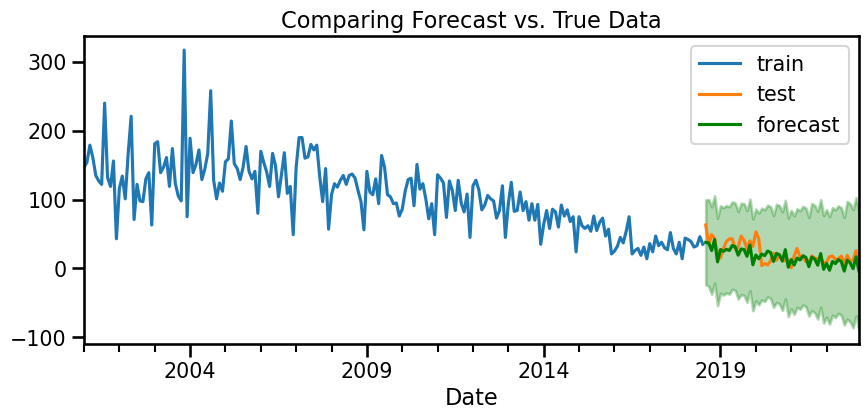

In [737]:
# Obtain summary of forecast as dataframe
forecast_df = sarima_iter.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df)
# Obtain metrics
regression_metrics_ts(test, forecast_df["mean"])



#### Fit Statsmodels SARIMA Model Using the Parameters from auto_arima

In [738]:
import pmdarima as pm
# Default auto_arima will select model based on AIC score
auto_model_3 = pm.auto_arima(
    train,
    seasonal=True,  # True or False
    m=12,  # if seasonal
    trace=True
)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2204.046, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2115.266, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2051.376, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2202.075, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2068.857, Time=0.13 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2023.330, Time=0.62 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2044.748, Time=0.43 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2023.824, Time=1.66 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2024.717, Time=1.50 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2048.927, Time=0.54 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2040.419, Time=0.58 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2144.488, Time=0.37 sec
 ARIMA(1,1,1)(1,0,1)[12] inte

In [739]:
# Try auto_arima orders

sarima = tsa.ARIMA(train, order = auto_model_3.order, seasonal_order=auto_model_3.seasonal_order).fit()

# Obtain summary
sarima.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                        NARCOTICS   No. Observations:                  211
Model:             ARIMA(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1006.406
Date:                          Wed, 12 Jun 2024   AIC                           2020.811
Time:                                  13:17:43   BIC                           2034.200
Sample:                              01-31-2001   HQIC                          2026.224
                                   - 07-31-2018                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9059      0.031    -28.893      0.000      -0.967      -0.844
ar.S.L12       0.9696      0.030     31.817      0.000       0.910       1.029
ma.S.L12      -0.8182      0.092     -8.874      0.000      -0.999      -0.637
sigma2       808.8281     57.678     14.023      0.000     695.782     921.874
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               532.00
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             1.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 13.564
- MSE = 279.514
- RMSE = 16.719
- R^2 = -0.347
- MAPE = 112.66%


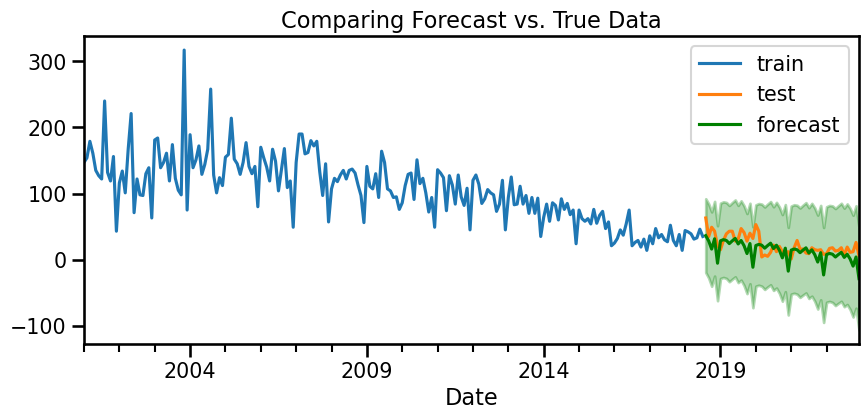

In [740]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df)
# Obtain metrics
regression_metrics_ts(test, forecast_df["mean"])


#### To compare the two models (Model 1 and Model 2), we will analyze performance metrics such as MAE, MSE, RMSE, R², MAPE, and AIC to provide a comprehensive evaluation.

*  Model 1:
     - MAE: 10.640
     - MSE: 169.226
      - RMSE: 13.009
      - R²: 0.185
      - MAPE: 89.19%
      - AIC: 1960.191
* Model 2:
  - MAE: 13.564
   - MSE: 279.514
    - RMSE: 16.719
    - R²: -0.347 
    - MAPE: 112.66%
    - AIC: 2020.811
#### Analysis:
 * AIC:

      - Model 1 has a lower AIC (1960.191) compared to Model 2 (2020.811). This suggests that Model 1 offers a better fit with the data based on the AIC criterion.
 * Error Metrics:

     - Comparing the error metrics, Model 1 shows better performance with lower MAE, RMSE, and MAPE, indicating smaller error margins compared to Model 2.


#### Conclusion:
Model 1 outperforms Model 2 based on MAE, RMSE, MAPE, R², and AIC metrics. Therefore, Model 1 is the better choice in terms of performance and quality.

#### Fit a final model on the entire time series

In [741]:
#Best pdqPDQm: (0, 0, 2, 1, 1, 2, 12)

final_model  =  tsa.ARIMA(ts_2, order=(0,0,2), seasonal_order=(1,1,2,12)).fit()
final_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                        NARCOTICS   No. Observations:                  264
Model:             ARIMA(0, 0, 2)x(1, 1, 2, 12)   Log Likelihood               -1207.109
Date:                          Wed, 12 Jun 2024   AIC                           2426.218
Time:                                  13:17:45   BIC                           2447.394
Sample:                              01-31-2001   HQIC                          2434.739
                                   - 12-31-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2125      0.066      3.240      0.001       0.084       0.341
ma.L2          0.1473      0.055      2.666      0.008       0.039       0.256
ar.S.L12       0.8407      0.107      7.821      0.000       0.630       1.051
ma.S.L12      -1.5425      0.112    -13.714      0.000      -1.763      -1.322
ma.S.L24       0.6834      0.076      9.026      0.000       0.535       0.832
sigma2       809.6856     50.928     15.899      0.000     709.868     909.503
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               406.53
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

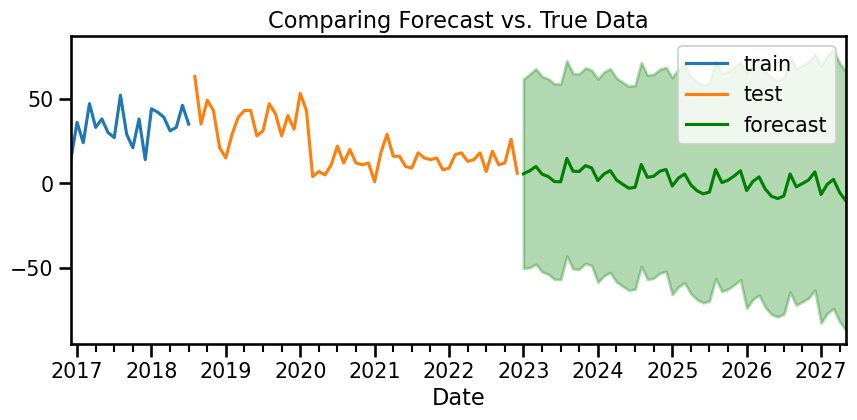

In [742]:
# Ger forecast into true future (fit on entrie time series)
forecast_df = final_model.get_forecast(len(test)).summary_frame()

plot_forecast(train, test, forecast_df, n_train_lags = 20);



In [743]:
# Define starting and final values
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
# Change in x
delta = final_value - starting_value
print(f'The change in Narcotics  over the forecast is {delta: .2f}.')
perc_change = (delta/starting_value) *100
print (f'The percentage change is {perc_change :.2f}%.')



The change in Narcotics  over the forecast is -15.92.
The percentage change is -282.05%.


# Final Evaluation:

#### Change in Theft over the forecast period:

  * The change in theft is -9.58, indicating a decrease in theft-related crimes.
Percentage change in Theft:

   * The percentage change in theft is -8.56%. This indicates a noticeable decrease in theft crime rates.
#### Change in Narcotics over the forecast period:

* The change in narcotics is -15.92, indicating a sharp decline in narcotics-related crimes.
Percentage change in Narcotics:

* The percentage change in narcotics is -282.05%. This indicates a significant and dramatic decline in narcotics-related crime rates.
Based on these numbers:

#### Which type of crime is expected to have the highest monthly crime count at the end of the forecast period?

* Based on the change in theft, theft crime is expected to have the highest monthly crime count at the end of the forecast.
#### Which type of crime is expected to have the highest net change by the end of the forecast period?

* Based on the substantial decline in narcotics-related crimes, narcotics-related crime is expected to have the highest net change by the end of the forecast.
#### Which type of crime is expected to have the highest percentage change by the end of the forecast period?

* Based on the drastic percentage change in narcotics, narcotics-related crime is expected to have the highest percentage change by the end of the forecast.